#Proyecto Final - Análisis de Airbnb en Europa
###Profesores: Pedro Arturo Flores Silva, Karen Rubí Jiménez López
###Alumnos: Castillo Reynoso Ivan Alexis, Loreto Silva Marco, Rodríguez Martínez Fanny Arlin y Rubio Juárez Elizabeth

Al momento de planear un viaje, siempre buscamos la mejor opción. Para ello se consideran varios aspectos, pero en particular el precio del lugar en el cual nos vamos a alojar. Actualmente, airbnb es la plataforma más usada para rentar casas, departamentos, cabañas, entre otros. De acuerdo a Airbnb, una media de dos millones de viajeros se alojan cada noche en lugares proporcionados a través de la plataforma.

Es por ello que en este proyecto te presentamos un análisis de los airbnb's de las 10 ciudades más visitadas en Europa. Lo anterior mediante el dataset en Kaggle llamado ''*Airbnb Prices in European Cities*''. 

In [ ]:
from google.colab import drive                          #Como trabajamos en Colaboratory, 
drive.mount("./drive", force_remount=True)              #comenzamos montando en el drive

Mounted at ./drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Libreria que no tenemos instalada, y usaremos mas adelante.

In [ ]:
!python -m pip install basemap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
from os.path import join                  #importamos las librerias que ocuparemos
import pandas as pd
import csv
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import pylab


%matplotlib inline

#Ruta de nuestros data frames y otros archivos
path = "./drive/MyDrive/Proyecto_Final_DS"   

Ahora cargamos los archivos de todas las ciudades.

In [ ]:
#Nombres de los archivos
amsterdam_daily = pd.read_csv(join(path,'amsterdam_weekdays.csv'))
amsterdam_wknd = pd.read_csv(join(path,'amsterdam_weekends.csv'))

athens_daily = pd.read_csv(join(path,'athens_weekdays.csv'))
athens_wknd = pd.read_csv(join(path,'athens_weekends.csv'))

barcelona_daily = pd.read_csv(join(path,'barcelona_weekdays.csv'))
barcelona_wknd = pd.read_csv(join(path,'barcelona_weekends.csv'))

berlin_daily = pd.read_csv(join(path,'berlin_weekdays.csv'))
berlin_wknd = pd.read_csv(join(path,'berlin_weekends.csv'))

budapest_daily = pd.read_csv(join(path,'budapest_weekdays.csv'))
budapest_wknd = pd.read_csv(join(path,'budapest_weekends.csv'))

lisbon_daily = pd.read_csv(join(path,'lisbon_weekdays.csv'))
lisbon_wknd = pd.read_csv(join(path,'lisbon_weekends.csv'))

london_daily = pd.read_csv(join(path,'london_weekdays.csv'))
london_wknd = pd.read_csv(join(path,'london_weekends.csv'))

paris_daily = pd.read_csv(join(path,'paris_weekdays.csv'))
paris_wknd = pd.read_csv(join(path,'paris_weekends.csv'))

rome_daily = pd.read_csv(join(path,'rome_weekdays.csv'))
rome_wknd = pd.read_csv(join(path,'rome_weekends.csv'))

vienna_daily = pd.read_csv(join(path,'vienna_weekdays.csv'))
vienna_wknd = pd.read_csv(join(path,'vienna_weekends.csv'))

Como es de nuestro interés diferenciar entre los valores correspondientes a los fines de semana y días entre semana, creamos una nueva columna llamada ''Tipo'' donde asignamos ''ES'' para los archivos de los días entre semana y ''FN'' para los fines de semana.

In [ ]:
#Asignamos el diferenciador a cada archivo en la nueva columna ''Tipo''
amsterdam_daily['Tipo'] = 'ES'
amsterdam_wknd['Tipo'] = 'FN'
athens_daily['Tipo']= 'ES'
athens_wknd['Tipo']= 'FN'
barcelona_daily['Tipo']='ES'
barcelona_wknd['Tipo']= 'FN'
berlin_daily['Tipo'] = 'ES'
berlin_wknd['Tipo'] ='FN'
budapest_daily['Tipo'] = 'ES'
budapest_wknd['Tipo'] = 'FN'
lisbon_daily['Tipo'] ='ES'
lisbon_wknd['Tipo'] = 'FN'
london_daily['Tipo'] ='ES'
london_wknd['Tipo'] = 'FN'
paris_daily['Tipo'] = 'ES'
paris_wknd['Tipo'] = 'FN'
rome_daily['Tipo'] = 'ES'
rome_wknd['Tipo'] = 'FN'
vienna_daily['Tipo'] = 'ES'
vienna_wknd['Tipo'] = 'FN'

Como los data frames vienen separados por los registros entre semana y fines de semana, es necesario tenerlos bajo un mismo nombre, por lo cual concatenamos los archivos.

In [ ]:
#Concatenación de los archivos bajo un mismo nombre
amsterdam = pd.concat([amsterdam_daily,amsterdam_wknd])
athens = pd.concat([athens_daily,athens_wknd])
barcelona = pd.concat([barcelona_daily,barcelona_wknd])
berlin = pd.concat([berlin_daily,berlin_wknd])
budapest = pd.concat([budapest_daily,budapest_wknd])
lisbon = pd.concat([lisbon_daily,lisbon_wknd])
london = pd.concat([london_daily,london_wknd])
paris = pd.concat([paris_daily,paris_wknd])
rome = pd.concat([rome_daily,rome_wknd])
vienna = pd.concat([vienna_daily,vienna_wknd])

Se observaran el tipo de varibles y si hay datos nulos en los diferentes DataFrame, para esto se imprimira la info de uno de los conjuntos.

In [ ]:
#Imprimimos la informacion de las variables
amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 976
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2080 non-null   int64  
 1   realSum                     2080 non-null   float64
 2   room_type                   2080 non-null   object 
 3   room_shared                 2080 non-null   bool   
 4   room_private                2080 non-null   bool   
 5   person_capacity             2080 non-null   float64
 6   host_is_superhost           2080 non-null   bool   
 7   multi                       2080 non-null   int64  
 8   biz                         2080 non-null   int64  
 9   cleanliness_rating          2080 non-null   float64
 10  guest_satisfaction_overall  2080 non-null   float64
 11  bedrooms                    2080 non-null   int64  
 12  dist                        2080 non-null   float64
 13  metro_dist                  2080 n

Se observa que no hay datos nulos en las variables, y que se tienen variables de enteras, flotantes, booleanas y objetos. Entre las enteras están: multi, biz beedrooms; las flotantes: realSum, person_capacity, cleanliness_rating, guest_satisfaction_overall, dist. metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng y lat; booleanas: room_shared, room_private y host_is_superhost; object: room_type y tipo.

Ahora veamos las primeras tres filas del dataframe

In [ ]:
#Se imprimen as primeras 3 filas
amsterdam.head(3)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   

   bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0         1  5.022964    2.539380   78.690379         4.166708   98.253896   
1         1  0.488389    0.239404  631.176378        33.421209  837.280757   
2         1  5.748312    3.651621   75.275877         3.985908   95.386955   

   rest_index_norm      lng       lat  Tipo  
0         6.846473  4.90569  52.41772    ES  
1        58.342928  4.90005  52.37432    ES  
2         6.646700  4.97512  52.36103    ES  

[3 rows x 21 columns]

Se observa que se presentan dos indices, eso se areglara en las siguientes celdas, se observan como se presentan las variables descritas anteriormente.

Para poder identificar a los Airbnb con un único identificador, renombramos la columna ''Unnamed: 0'' y reescribimos los valores de la columna, ya que al concatenar, tenemos valores repetidos.

In [ ]:
#Cambio de nombre de la columna y en los valores por su índice
amsterdam['Unnamed: 0'] = amsterdam.reset_index().index
amsterdam.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
athens['Unnamed: 0'] = athens.reset_index().index
athens.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
barcelona['Unnamed: 0'] = barcelona.reset_index().index
barcelona.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
berlin['Unnamed: 0'] = berlin.reset_index().index
berlin.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
budapest['Unnamed: 0'] = budapest.reset_index().index
budapest.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
lisbon['Unnamed: 0'] = lisbon.reset_index().index
lisbon.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
london['Unnamed: 0'] = london.reset_index().index
london.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
paris['Unnamed: 0'] = paris.reset_index().index
paris.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
rome['Unnamed: 0'] = rome.reset_index().index
rome.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
vienna['Unnamed: 0'] = vienna.reset_index().index
vienna.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)


Se concatenaran los diferentes dataframes de las ciudades para tener un dataframe que incluya a todas estas, pero para identificarlas se agregara una nueva columna 'city.'

In [ ]:
#Añadimos la columna city a cada una de las ciudades
amsterdam['city'] = 'amsterdam'
athens['city'] = 'athens'
barcelona['city'] = 'barcelona'
berlin['city'] = 'berlin'
budapest['city'] = 'budapest'
lisbon['city'] = 'lisbon'
london['city'] = 'london'
paris['city'] = 'paris'
rome['city'] = 'rome'
vienna['city'] = 'vienna'

In [ ]:
#Concatenamos los dataframes
cities = pd.concat([amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna])

##Mapas


Con el propósito de presentar un panorama general de la oferta de Airbnb, se realizaron mapas con las ubicaciones de los Airbnb para cada ciudad.

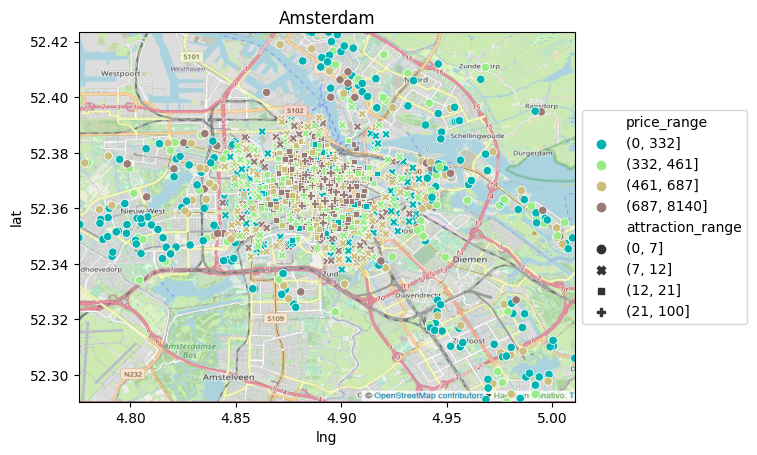

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
amsterdam['price_range'] = pd.cut(amsterdam.realSum, [0,332,461,687,8140])
amsterdam['attraction_range'] = pd.cut(amsterdam.attr_index_norm, [0, 7, 12, 21, 100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
amsterdam_map = plt.imread('./drive/MyDrive/Proyecto_Final_DS/Maps/amsterdam.png')

#Se definen las dimensiones del mapa
amsterdam_box = (amsterdam.lng.min(), amsterdam.lng.max(), amsterdam.lat.min(), amsterdam.lat.max())

ams1 = sns.scatterplot(data=amsterdam, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
ams1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ams1.set_xlim(amsterdam.lng.min(),amsterdam.lng.max())
ams1.set_ylim(amsterdam.lat.min(),amsterdam.lat.max())
ams1.set(title='Amsterdam')
ams1.imshow(amsterdam_map,zorder=0,extent = amsterdam_box, aspect='auto')

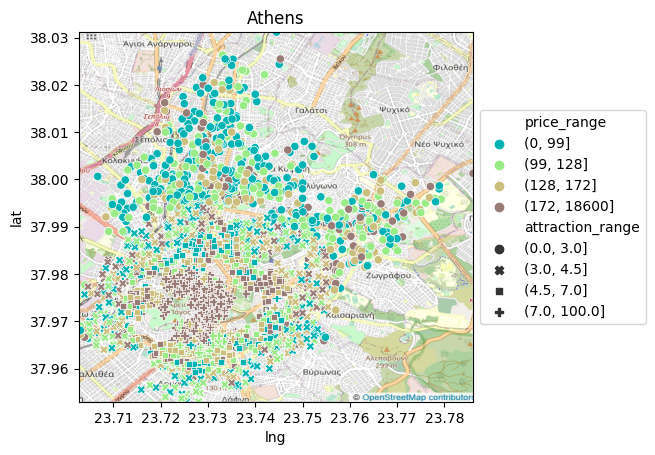

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
athens['price_range'] = pd.cut(athens.realSum, [0,99,128,172,18600])
athens['attraction_range'] = pd.cut(athens.attr_index_norm, [0,3,4.5, 7, 100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
athens_map = plt.imread(path+'/Maps/athens.png')

#Se definen las dimensiones del mapa
athens_box = (athens.lng.min(), athens.lng.max(), athens.lat.min(), athens.lat.max())

ath1 = sns.scatterplot(data=athens, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
ath1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ath1.set_xlim(athens.lng.min(),athens.lng.max())
ath1.set_ylim(athens.lat.min(),athens.lat.max())
ath1.set(title='Athens')
ath1.imshow(athens_map,zorder=0,extent = athens_box, aspect='equal')

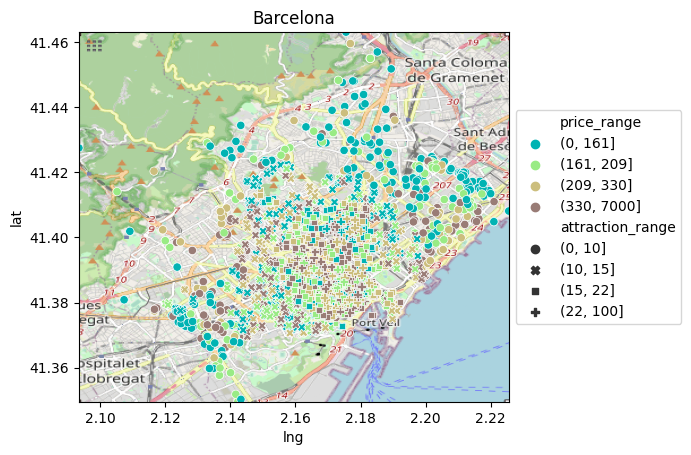

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
barcelona['price_range'] = pd.cut(barcelona.realSum, [0,161,209,330,7000])
barcelona['attraction_range'] = pd.cut(barcelona.attr_index_norm, [0,10,15,22,100])


#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
barcelona_map = plt.imread(path+'/Maps/barcelona.png')

#Se definen las dimensiones del mapa
barcelona_box = (barcelona.lng.min(), barcelona.lng.max(), barcelona.lat.min(), barcelona.lat.max())

bar1 = sns.scatterplot(data=barcelona, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
bar1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
bar1.set_xlim(barcelona.lng.min(),barcelona.lng.max())
bar1.set_ylim(barcelona.lat.min(),barcelona.lat.max())
bar1.set(title='Barcelona')
bar1.imshow(barcelona_map,zorder=0,extent = barcelona_box, aspect='equal')

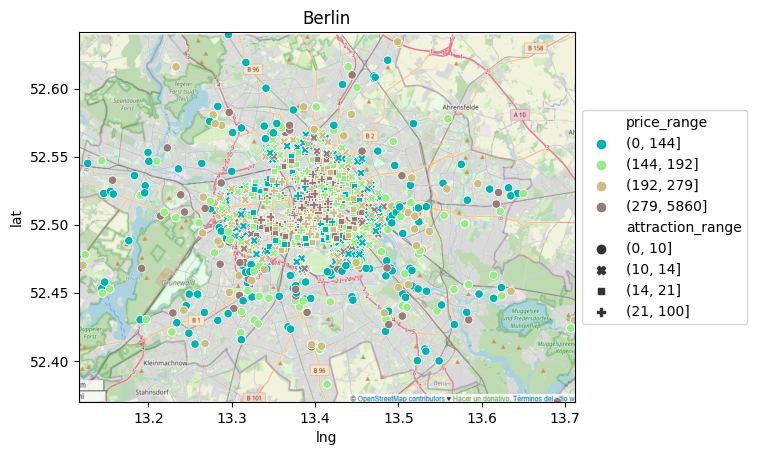

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
berlin['price_range'] = pd.cut(berlin.realSum, [0,144,192,279,5860])
berlin['attraction_range'] = pd.cut(berlin.attr_index_norm, [0,10,14,21,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
berlin_map = plt.imread(path+'/Maps/berlin.png')

#Se definen las dimensiones del mapa
berlin_box = (berlin.lng.min(), berlin.lng.max(), berlin.lat.min(), berlin.lat.max())

ber1 = sns.scatterplot(data=berlin, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
ber1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ber1.set_xlim(berlin.lng.min(),berlin.lng.max())
ber1.set_ylim(berlin.lat.min(),berlin.lat.max())
ber1.set(title='Berlin')
ber1.imshow(berlin_map,zorder=0,extent = berlin_box, aspect='auto')

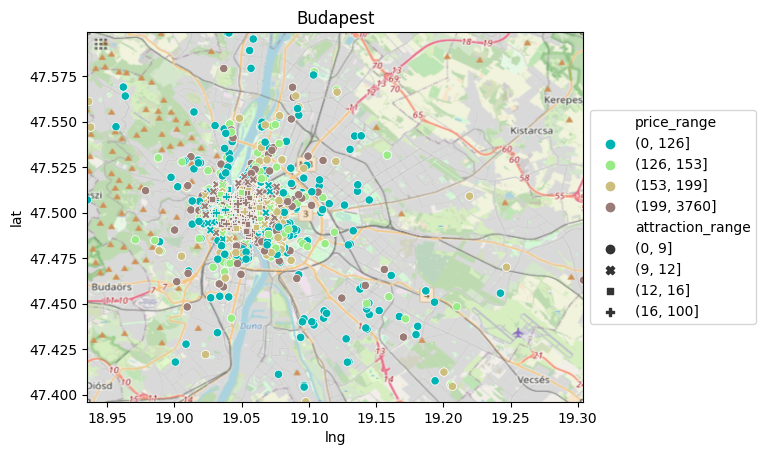

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
budapest['price_range'] = pd.cut(budapest.realSum, [0,126,153,199,3760])
budapest['attraction_range'] = pd.cut(budapest.attr_index_norm, [0,9,12,16,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
budapest_map = plt.imread(path+'/Maps/budapest.png')

#Se definen las dimensiones del mapa
budapest_box = (budapest.lng.min(), budapest.lng.max(), budapest.lat.min(), budapest.lat.max())

bud1 = sns.scatterplot(data=budapest, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
bud1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
bud1.set_xlim(budapest.lng.min(), budapest.lng.max())
bud1.set_ylim(budapest.lat.min(),budapest.lat.max())
bud1.set(title='Budapest')
bud1.imshow(budapest_map,zorder=0,extent = budapest_box, aspect='auto')

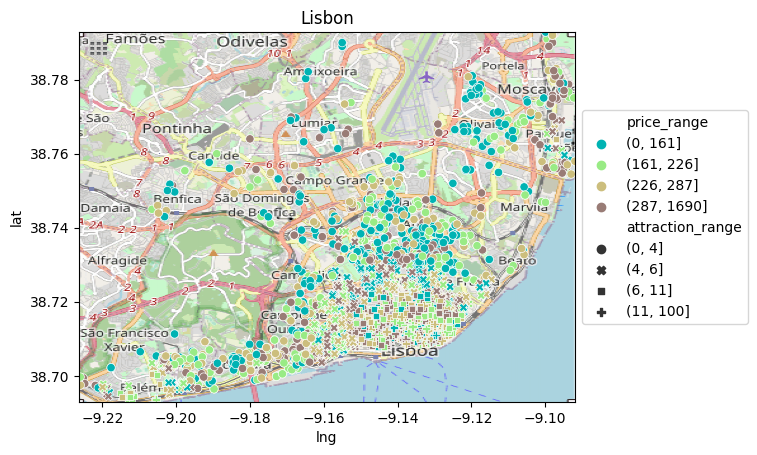

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
lisbon['price_range'] = pd.cut(lisbon.realSum, [0, 161, 226, 287, 1690])
lisbon['attraction_range'] = pd.cut(lisbon.attr_index_norm, [0,4,6,11, 100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
lisbon_map = plt.imread(path+'/Maps/lisbon.png')

#Se definen las dimensiones del mapa
lisbon_box = (lisbon.lng.min(), lisbon.lng.max(), lisbon.lat.min(), lisbon.lat.max())

lis1 = sns.scatterplot(data=lisbon, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
lis1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
lis1.set_xlim(lisbon.lng.min(), lisbon.lng.max())
lis1.set_ylim(lisbon.lat.min(),lisbon.lat.max())
lis1.set(title='Lisbon')
lis1.imshow(lisbon_map,zorder=0,extent = lisbon_box, aspect='auto')

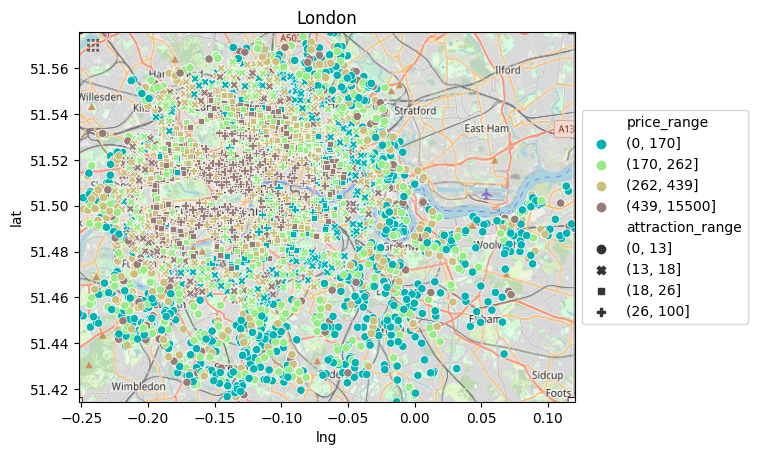

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
london['price_range'] = pd.cut(london.realSum, [0, 170, 262, 439, 15500])
london['attraction_range'] = pd.cut(london.attr_index_norm, [0,13,18,26,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
london_map = plt.imread(path+'/Maps/london.png')

#Se definen las dimensiones del mapa
london_box = (london.lng.min(), london.lng.max(), london.lat.min(), london.lat.max())

lond1 = sns.scatterplot(data=london, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
lond1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
lond1.set_xlim(london.lng.min(),london.lng.max())
lond1.set_ylim(london.lat.min(),london.lat.max())
lond1.set(title='London')
lond1.imshow(london_map,zorder=0,extent = london_box, aspect='auto')

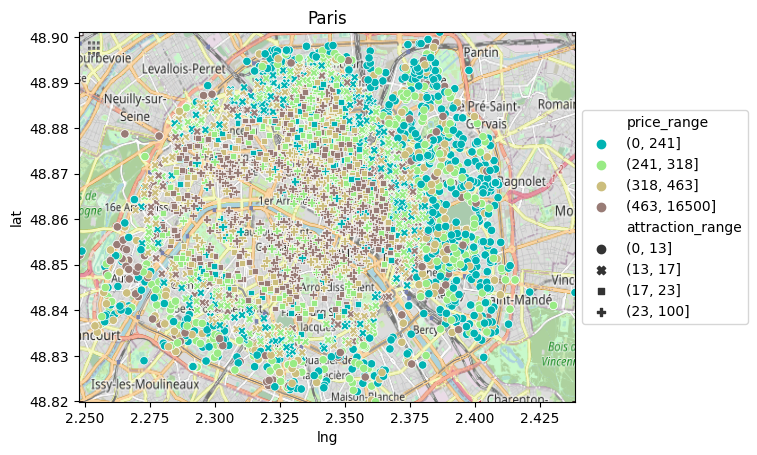

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
paris['price_range'] = pd.cut(paris.realSum, [0,241, 318, 463, 16500])
paris['attraction_range'] = pd.cut(paris.attr_index_norm, [0,13,17,23,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
paris_map = plt.imread(path+'/Maps/paris.png')

#Se definen las dimensiones del mapa
paris_box = (paris.lng.min(), paris.lng.max(), paris.lat.min(), paris.lat.max())

par1 = sns.scatterplot(data=paris, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
par1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
par1.set_xlim(paris.lng.min(),paris.lng.max())
par1.set_ylim(paris.lat.min(),paris.lat.max())
par1.set(title='Paris')
par1.imshow(paris_map,zorder=0,extent = paris_box, aspect='auto')

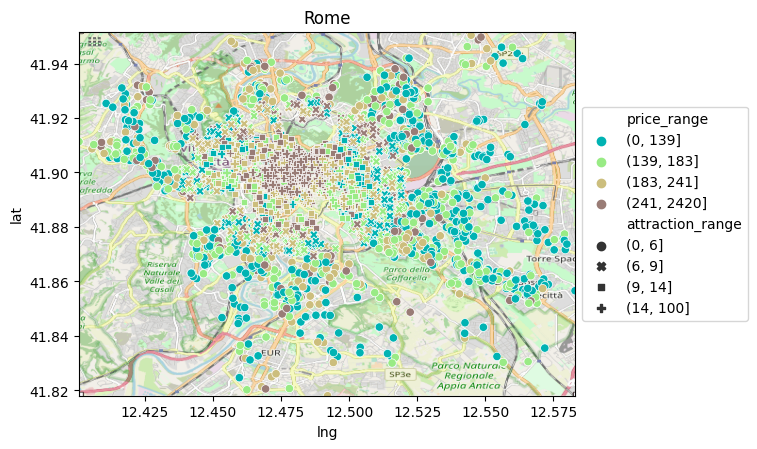

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
rome['price_range'] = pd.cut(rome.realSum, [0,139, 183, 241, 2420])
rome['attraction_range'] = pd.cut(rome.attr_index_norm, [0,6,9,14,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
rome_map = plt.imread(path+'/Maps/rome.png')

#Se definen las dimensiones del mapa
rome_box = (rome.lng.min(), rome.lng.max(), rome.lat.min(), rome.lat.max())

rom1 = sns.scatterplot(data=rome, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
rom1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
rom1.set_xlim(rome.lng.min(),rome.lng.max())
rom1.set_ylim(rome.lat.min(),rome.lat.max())
rom1.set(title='Rome')
rom1.imshow(rome_map,zorder=0,extent = rome_box, aspect='equal')

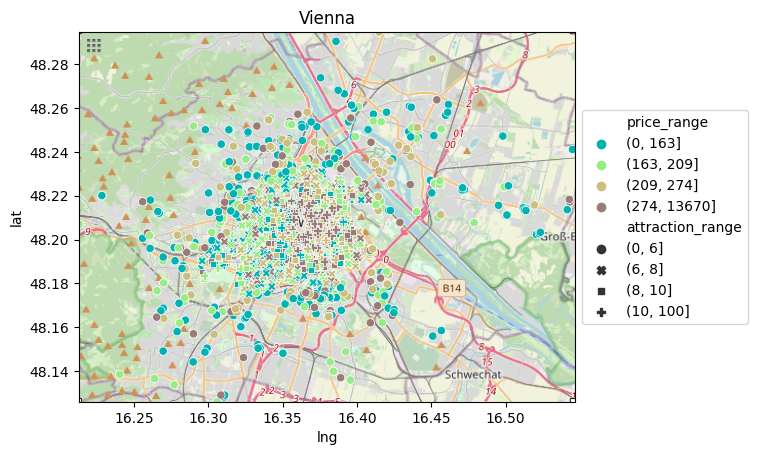

In [ ]:
#Dividimos el precio en los quartiles y el attraction index en 5 categorías
vienna['price_range'] = pd.cut(vienna.realSum, [0,163, 209, 274, 13670])
vienna['attraction_range'] = pd.cut(vienna.attr_index_norm, [0,6,8,10,100])

#Graficamos latitud contra longitud con las categorías anteriormente creadas
#Cargamos el mapa de la ciudad
vienna_map = plt.imread(path+'/Maps/vienna.png')

#Se definen las dimensiones del mapa
vienna_box = (vienna.lng.min(), vienna.lng.max(), vienna.lat.min(), vienna.lat.max())

vin1 = sns.scatterplot(data=vienna, x='lng', y='lat', hue ='price_range', style='attraction_range', palette='terrain')
vin1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
vin1.set_xlim(vienna.lng.min(),vienna.lng.max())
vin1.set_ylim(vienna.lat.min(),vienna.lat.max())
vin1.set(title='Vienna')
vin1.imshow(vienna_map,zorder=0,extent = vienna_box, aspect='auto')

En la mayoría de las ciudades, los precios más altos se concentran alrededor de las principales atracciones, por ejemplo en Londres o en Roma. Sin embargo, es posible identificar algunos Airbnb que cuentan con un attraction index  alto y un precio en la categoría más baja, como en Paris, Lisboa, Budapest, Barcelona, Berlin o Ámsterdam. 

Se observa que en ciudades como Ámsterdam, Barcelona o Lisboa, las principales atracciones se encuentran distribuidas por toda la ciudad; por lo que es posible encontrar un Airbnb que esté cerca de alguna atracción y elegir entre una variedad de precios. Por otro lado, en ciudades como Roma, Londres y Atenas, las atracciones y los precios más altos se concentran alrededor del centro de la ciudad. En estas ciudades los precios decrecen a las afueras de la ciudad. 

En Paris y Londres existe una cantidad significativamente mayor de Airbnb respecto a las otras ciudades del estudio, mientras que en Budapest el número de Airbnb es notablemente menor. 

##Características

Una de las características que queremos, es la capacidad de los alojamientos en las ciudades. Por esto mismo, realizamos un histograma de la capacidad de alojamiento por Airbnb de cada ciudad.

In [ ]:
#Creamos listas con los nombres de las ciudades
names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
Names = ['Amsterdam', 'Atenas', 'Barcelona', 'Berlín', 'Budapest', 'Lisboa', 'Londres', 'París', 'Roma', 'Viena']


Ahora, hacemos nuestros histogramas con las listas creadas.

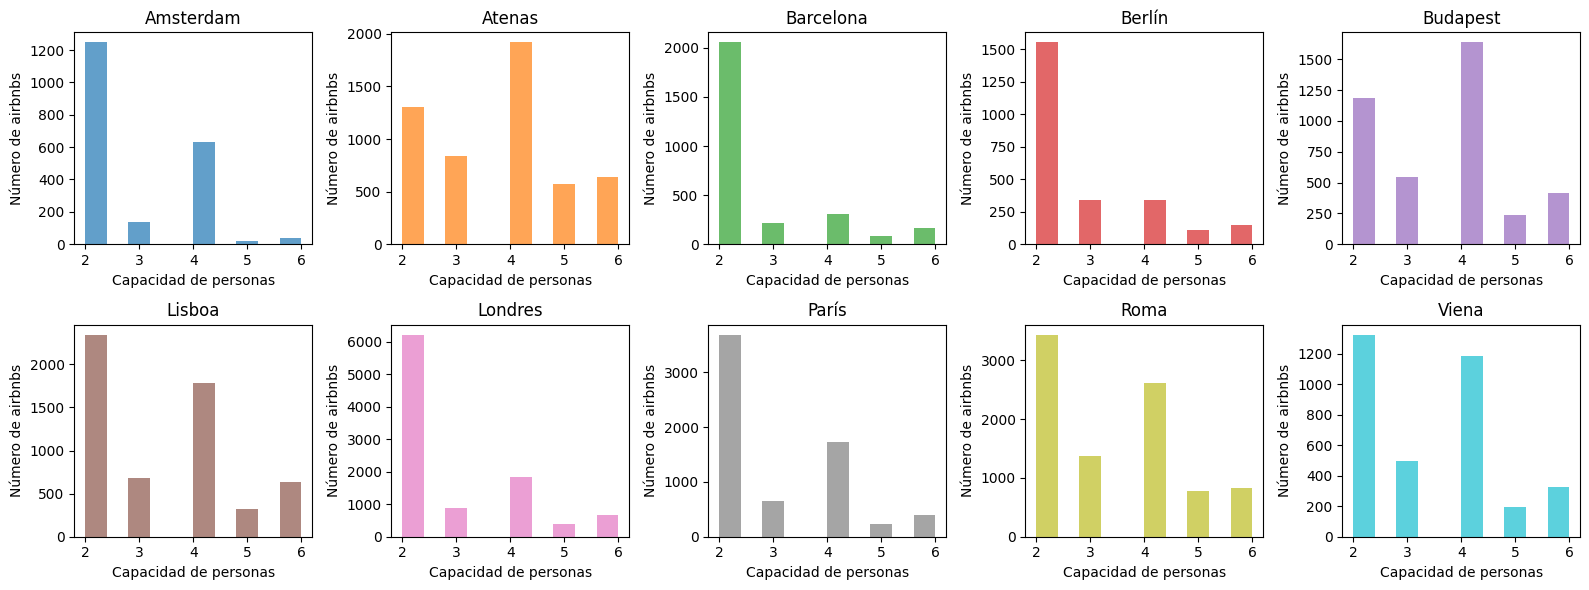

In [ ]:
#Lista de dataframes
data_frames = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

# Creamos un subarreglo de 2x5
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

# Loop que recorre los dataframes y los ejes correspondientes para trazar los histogramas
for i, (dataset, ax, title) in enumerate(zip(data_frames, axes.flatten(), Names)):
    ax.hist(dataset['person_capacity'], bins=10, color=f'C{i}', alpha=.7)  
    ax.set_title(title)
    ax.set_xlabel('Capacidad de personas')
    ax.set_ylabel('Número de airbnbs')

# Ajuste del espacio entre histogramas
plt.tight_layout()

# Graficamos
plt.show()

De estas gráficas, observamos que la mayoría de cuartos en Airbnb están adecuados para dos personas, siendo las opciones para viajar con más personas,  Atenas, Lisboa, Budapest, Roma y Viena, mientras que Berlín y Barcelona tienen un enfoque a estancias de dos personas.

Lo cual es un factor a considerar si se planea hacer el hospedaje en Airbnb, ya que podemos ver un cierto mercado dependiendo de las ciudades.

Otra caracteristica a estudiar es el tipo de cuartos que se ofrecen en cada ciudad.

<ipython-input-25-d1a859c2d7ca>:23: UserWarning: The figure layout has changed to tight
  fig.tight_layout();


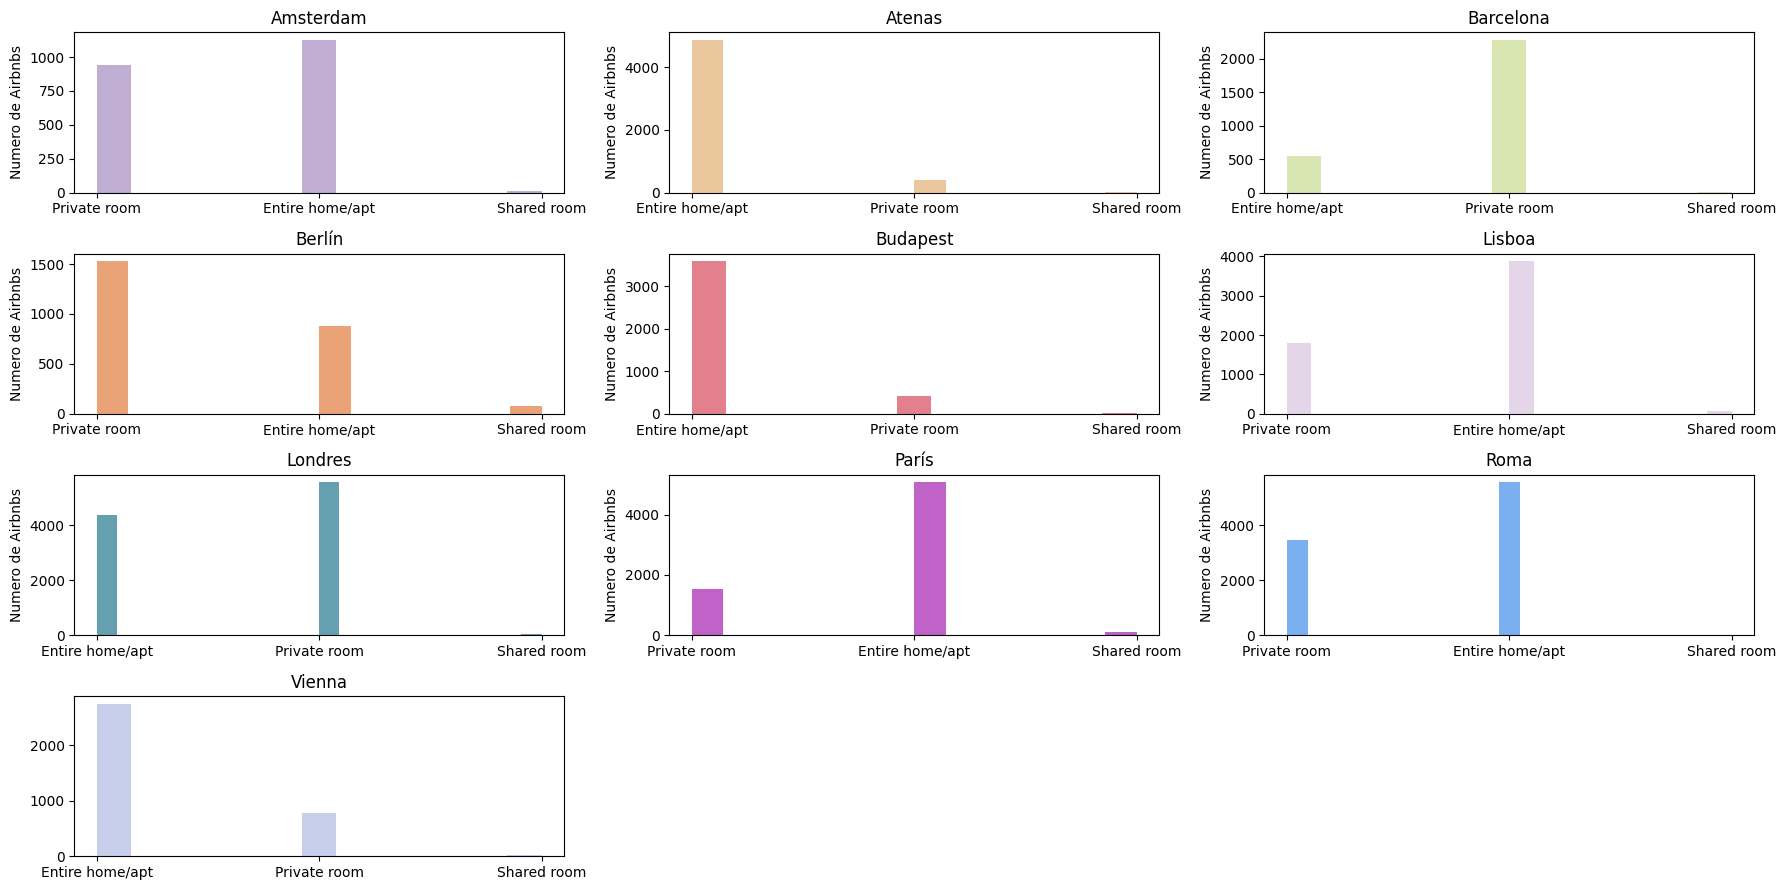

In [ ]:
#Definimos listas que se usaran, nombres de histogramas, colores y los dataframes a usar
Names = ['Amsterdam', 'Atenas', 'Barcelona', 'Berlín', 'Budapest', 'Lisboa', 'Londres', 'París', 'Roma', 'Viena']
Colores=['#A58ABF','#E3B075','#C9DC92','#E07C3E','#D84B5E','#DBC4DF','#24788F','#A71FB2','#428EEA','#A71979']
Ciud_nom=[amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

#Creamos un subplots de 4x3
fig, ax = plt.subplots(4, 3, figsize=(18, 9),constrained_layout = True)
con=-1

#Creamos los histogramas
for i in range(3):
  for j in range(3):
    con=con+1
    ax[i,j].hist(x=Ciud_nom[con][['room_type']], bins='auto', color=Colores[con],alpha=0.7)
    ax[i,j].set_title(Names[con])
    ax[i,j].set_ylabel('Numero de Airbnbs')
ax[3,0].hist(x=vienna[['room_type']], bins='auto', color='#C7CEEA')
ax[3,0].set_title('Vienna')

#Definimos las espacios vacios
ax[3,1].axis('off')
ax[3,2].axis('off')
fig.tight_layout();

# Graficamos
fig.show();

Se observa que en general los cuartos privados y las casas enteras/apartamentos son el tipo de Airbnb más popular que se ofrecen, en general, los cuartos compartidos no son ofertados, esto indica que no son  populares. Por otra parte, en Amsterdam y Londres se observa que la cantidad de cuartos privados y casas enteras/apartamentos son muy similares, sin embargo, en Amsterdam son más populares las casas enteras/apartamentos y en Londres los cuartos privados. En las demás ciudades se observa que hay una diferencia mayor entre los tipos de Airbnb, en Atenas, Budapest, Lisboa, Paris, Roma y Vienna son más populares las casas enteras/ apartamentos, y en Barcelona y Berlin son más populares los cuartos privados. Se observa una tendencia a que en Barcelona y Berlin el enoque de los Airbnb son para un numero de personas reducido.

##Críticas

Para conocer a las ciudades que cuentan con las mejores críticas o resẽnas, se realizo un boxplot con la distribución de la variable guest satisfaction overall

[Text(0.5, 1.0, 'Distribución de la variable  guest_satisfaction_overall \n por ciudad')]

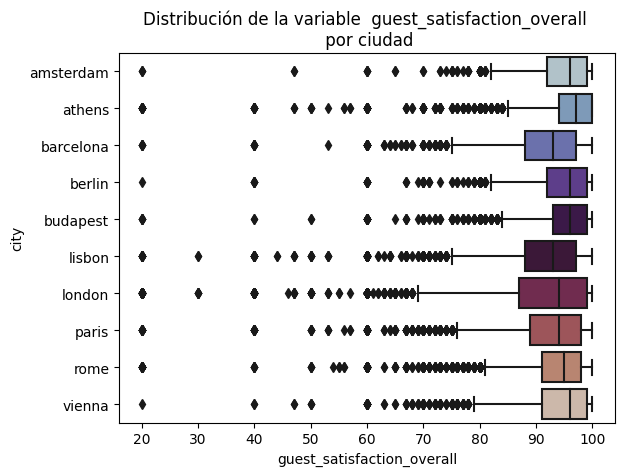

In [ ]:
#Realizamos ek boxplot
boxplot = sns.boxplot(data=cities,x='guest_satisfaction_overall', y='city', palette ='twilight')
boxplot.set(title = 'Distribución de la variable  guest_satisfaction_overall \n por ciudad')


Se observa que, en general, la mediana de las distribuciones se concentra en puntuaciones entre 90 y 100 con la presencia de algunos outliers en valores menores a 70. Todas las distribuciones son asimétricas a la izquierda, por lo que la mayoría de críticas son buenas o excelentes. Para Barcelona y Lisboa el tercer cuartil se encuentra cercano a 95, indicando que el 75 % de los Airbnb tienen a lo más una puntuación de 95. Para el resto de los destinos el tercer cuartil es más alto, siendo Atenas el mayor.
Se observa que para Londres el rango intercuartílico es mayor que para cualquier otro destino, lo que representa que existe un mayor número de puntuaciones m ́as bajas que en otras ciudades.

Para estudiar los factores que se relacionan con las mejores criticas hara un heatmap de la correlación de esta caracteristíca con las otras.

<Axes: >

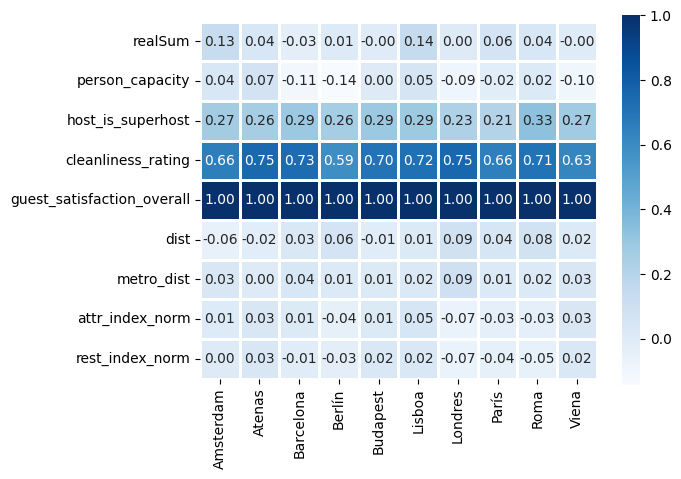

In [ ]:
#Lista de nombres de las ciudades
Names=['Amsterdam', 'Atenas', 'Barcelona', 'Berlín', 'Budapest', 'Lisboa', 'Londres', 'París', 'Roma', 'Viena']

#Definimos un diccionario para guardar la correlación 
dic_corr={}

#Ciclo para agregar la correlación de cada ciudad
for i in range(10):
  ciu_sel=Ciud_nom[i][['realSum','person_capacity','host_is_superhost','cleanliness_rating','guest_satisfaction_overall','dist','metro_dist','attr_index_norm','rest_index_norm']]
  corrc=ciu_sel.corr(method='pearson', min_periods=1).guest_satisfaction_overall
  dic_corr[Names[i]]=corrc

#Se gráfica el heatmap de la correlación
sns.heatmap(pd.DataFrame(dic_corr),square=True, annot=True, fmt='.2f',cmap='Blues',linewidths=1,linecolor='white')

Se observa que los que están relacionados con las criticas son la limpieza y en menor medida si un host es superhost. En el caso de la calificación que se le da a la limpieza esta relacionada aproximadamente entre 0.59 y 0.75; por otra parte, la otra característica relaciona es si un host es supehost, sin embargo, esta relación esta entre 0.21 y 0.33, es decir, es baja la relación, a pesar de esto se analizarán estas dos características.

Para analizar la relación entre las criticas y la limpieza se hará un grafico kde.

<Axes: xlabel='guest_satisfaction_overall', ylabel='Density'>

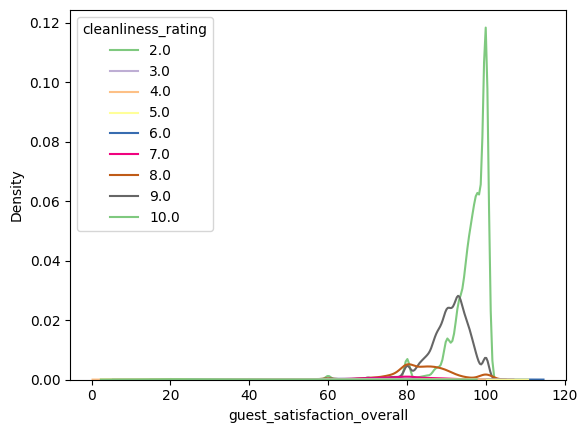

In [ ]:
#Se grafica un kdeplot que relacionen  'guest_satisfaction_overall' y 'cleanliness_rating'
sns.kdeplot(data=cities,x='guest_satisfaction_overall',hue='cleanliness_rating',palette='Accent')

Se observa que en general la limpieza es buena, también se observa que hay una relación entre las criticas y la limpieza, si se tiene buena limpieza las criticas son mejores, y mientras más sucio este las criticas son menos buenas.

La otra variable a analizar es si el host es un superhost.

<Axes: xlabel='guest_satisfaction_overall', ylabel='Density'>

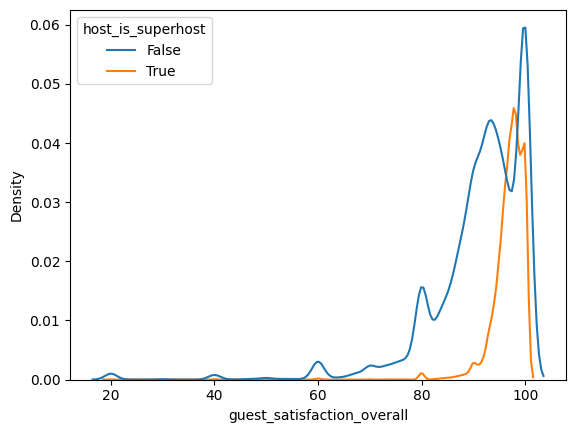

In [ ]:
#Se grafica un kdeplot que relacionen  'guest_satisfaction_overall' y 'host_is_super_host'
sns.kdeplot(data=cities,x='guest_satisfaction_overall',hue='host_is_superhost')

Se observa que para el caso de que el host si es un superhost las criticas tienden a acercarce al mayor puntaje de críticas, en el caso de que no lo sea se observa que el puntaje esta más disperso, por tanto podemos decir que si se puede relacionar en una pequeña medida que si el host es superhost con las críticas buenas.

##Precio


Con el objetivo de identificar los destinos más atractivos para cada presupuesto y necesidades. Se busca comparar los precios promedios de los Airbnb en cada ciudad para estancias entre semana y durante los fines de semana.

In [ ]:
#Para nuestro grafico, creamos esta lista para diferenciar entre los 
#días entre semana y fines de semana
valor = ['Precio promedio entre semana', 'Precio promiedio en fines de semana']

#Multiplicamos por 10, ya que teneos 10 ciudades
valores = valor * 10

#Guardamos en esta variable los nombres de las columnas
col_names = amsterdam.columns.values

Necesitamos crear un data frame con los datos de los precios promedio en días entre semana y fines de semana para cada ciudad, y una manera de diferenciarlos por ciudad. Por lo que hacemos lo siguiente.

In [ ]:
#Lista vacia
promedios = []

#Loop para calcular los promedios de los precios en fin de semana y entre semana
for a in names:
  df = globals()[a]
  mean_price_entre = df[df['Tipo']=='ES']['realSum'].mean()
  mean_price_fin = df[df['Tipo']=='FN']['realSum'].mean()

#Guardamos valores en la lista proemdios
  promedios.append(mean_price_entre)    
  promedios.append(mean_price_fin)

col_nombres_3 = [value for value in Names for i in range(2)]

#Hacemos un diccionario con estos valores
dic ={'col':col_nombres_3, 'tipo':valores, 'num':promedios}

#Volvemos un data frame el diccionario
df_airbnb = pd.DataFrame(dic)

Con nuestro data frame con los valores a graficar, realizamos lo siguiente:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amsterdam'),
  Text(1, 0, 'Atenas'),
  Text(2, 0, 'Barcelona'),
  Text(3, 0, 'Berlín'),
  Text(4, 0, 'Budapest'),
  Text(5, 0, 'Lisboa'),
  Text(6, 0, 'Londres'),
  Text(7, 0, 'París'),
  Text(8, 0, 'Roma'),
  Text(9, 0, 'Viena')])

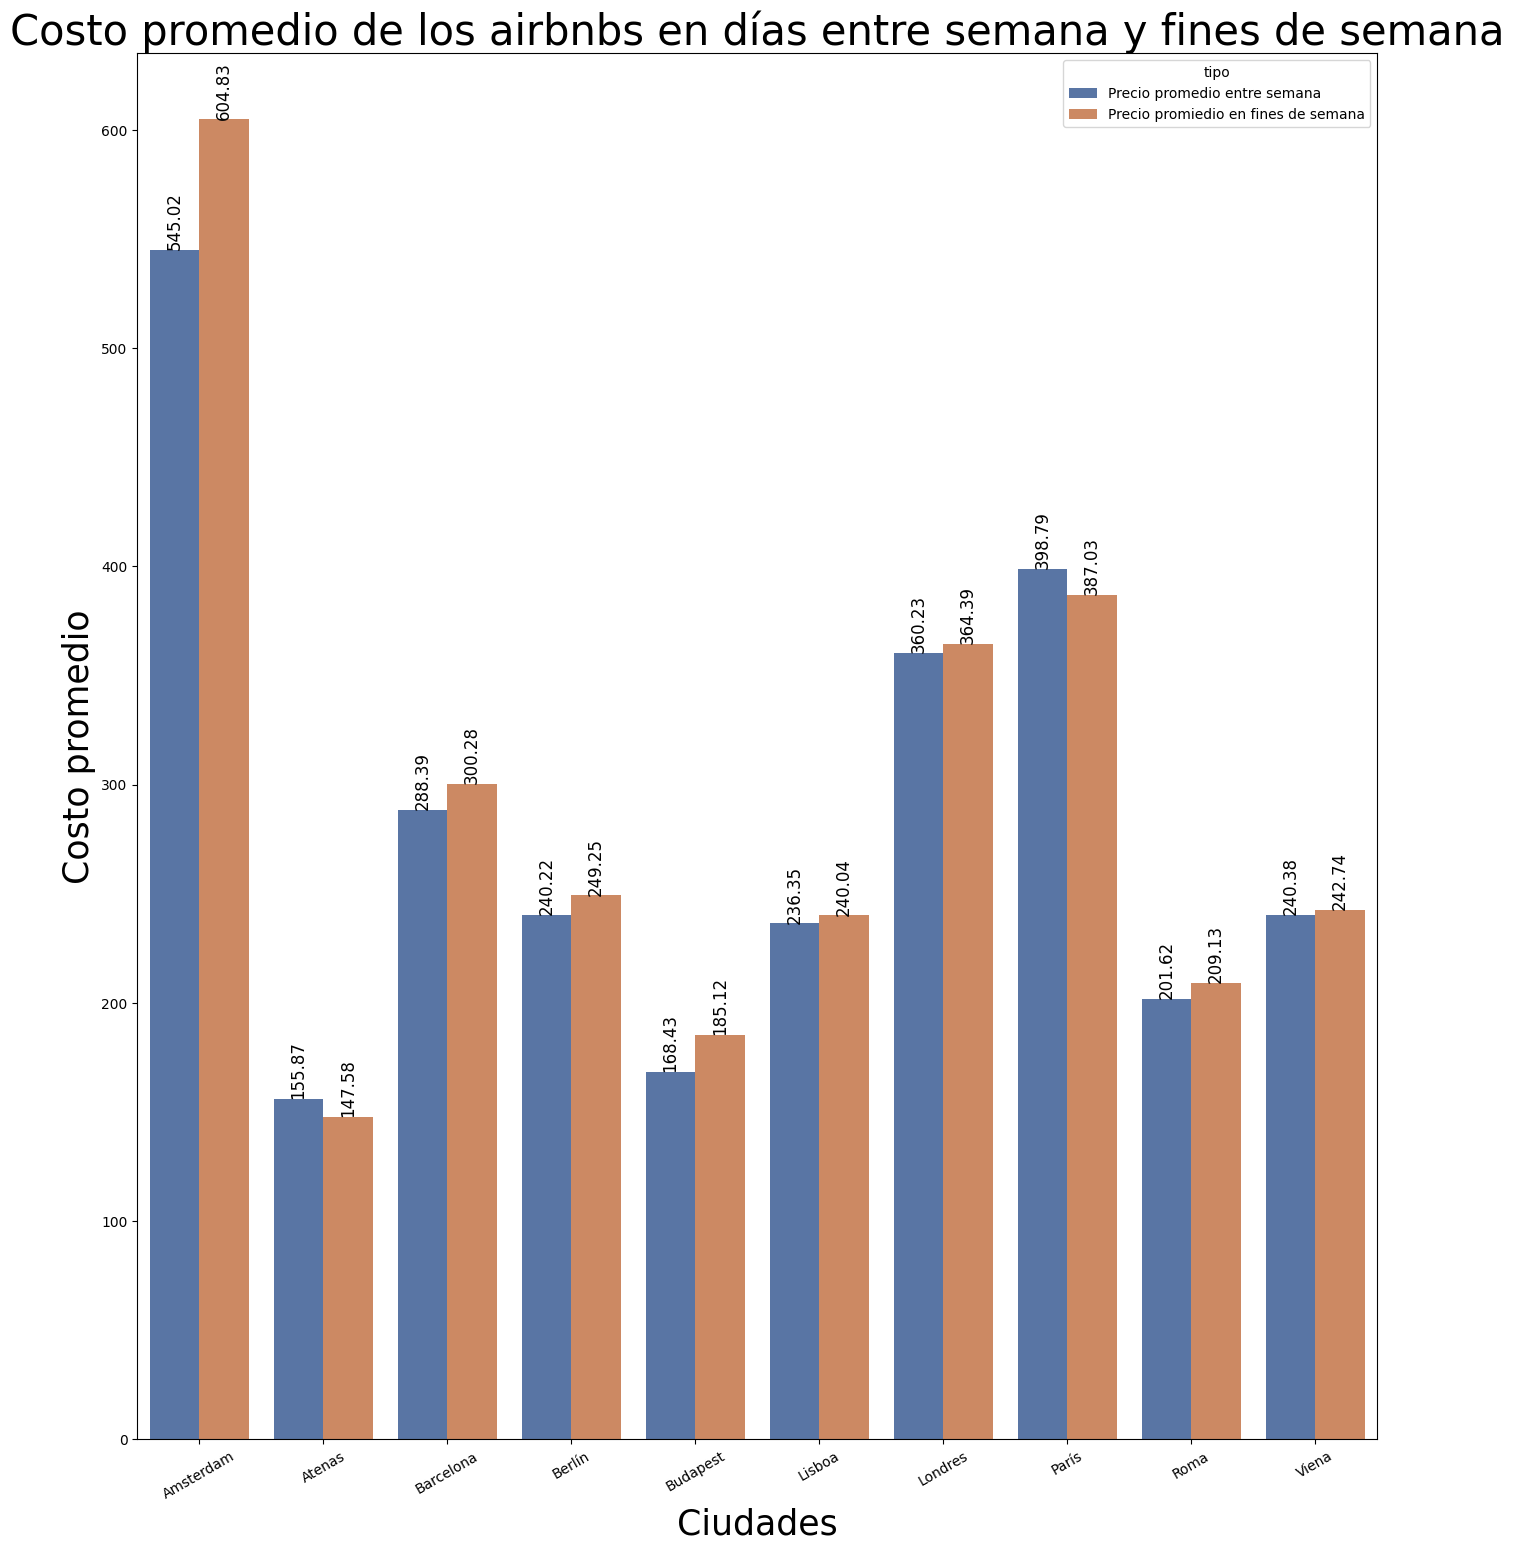

In [ ]:
#Graficas de barras donde podemos ver los valores promedio en los
#precios de los airbns por ciudades en fin de semana y entre semana


#Fijamos el tamaño
plt.figure(figsize=(16,18))        

#Vamos a graficar en
ax = sns.barplot(x='col', y='num', hue='tipo', data=df_airbnb,errorbar=None, palette="deep")    

#Especificaciones sobre la gráfica
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom', rotation=90)

#Título
plt.title('Costo promedio de los airbnbs en días entre semana y fines de semana', fontsize= 30)     

#Titulo de los ejes
plt.xlabel('Ciudades', fontsize=25)           
plt.ylabel('Costo promedio',fontsize= 25)

#Rotaos las etiquetas del eje x
plt.xticks(rotation=30)                 


De este gráfico podemos observar una clara diferencia en los precios en Amsterdam y el resto de ciudades, siendo la segunda más cara, París y Londres como la tercera más cara. 

A diferencia de la más accesible en cuanto a precios, tenemos a Atenas, con casi 400 euros de diferencia.

Dado que realizaremos una regresión lineal teniendo como variable de salida $realSum$; es de relevancia conocer la relación que tiene con las otras variables. Algunas de las variables son tipo `object`, por lo que, las convertiremos en `int64`. 

In [ ]:
#Unimos los archivos de entre semana y fines de semana
Amsterdam = pd.concat([amsterdam_daily,amsterdam_wknd])
Athens = pd.concat([athens_daily,athens_wknd])
Barcelona = pd.concat([barcelona_daily,barcelona_wknd])
Berlin = pd.concat([berlin_daily,berlin_wknd])
Budapest = pd.concat([budapest_daily,budapest_wknd])
Lisbon = pd.concat([lisbon_daily,lisbon_wknd])
London = pd.concat([london_daily,london_wknd])
Paris = pd.concat([paris_daily,paris_wknd])
Rome = pd.concat([rome_daily,rome_wknd])
Vienna = pd.concat([vienna_daily,vienna_wknd])

Vamos a convertir los valores string de la variable `room_type` a enteros. 

Shared room = 0 

Private room = 1

Entire home/apt = 2

In [ ]:
#Usamos el método replace() para hacer lo anterior
Amsterdam['room_type'] = Amsterdam['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Athens['room_type'] = Athens['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Barcelona['room_type'] = Barcelona['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Berlin['room_type'] = Berlin['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Budapest['room_type'] = Budapest['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Lisbon['room_type'] = Lisbon['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
London['room_type'] = London['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Paris['room_type'] = Paris['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Rome['room_type'] = Rome['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)
Vienna['room_type'] = Vienna['room_type'].replace('Shared room',0).replace('Private room', 1).replace('Entire home/apt', 2)

Vamos a convertir los valores string de la variable `Tipo` a int64. 

ES = 0 

FN = 1

In [ ]:
#Usamos el método replace() para hacer lo anterior
Amsterdam['Tipo'] = Amsterdam['Tipo'].replace('ES',0).replace('FN', 1)
Athens['Tipo'] = Athens['Tipo'].replace('ES',0).replace('FN', 1)
Barcelona['Tipo'] = Barcelona['Tipo'].replace('ES',0).replace('FN', 1)
Berlin['Tipo'] = Berlin['Tipo'].replace('ES',0).replace('FN', 1)
Budapest['Tipo'] = Budapest['Tipo'].replace('ES',0).replace('FN', 1)
Lisbon['Tipo'] = Lisbon['Tipo'].replace('ES',0).replace('FN', 1)
London['Tipo'] = London['Tipo'].replace('ES',0).replace('FN', 1)
Paris['Tipo'] = Paris['Tipo'].replace('ES',0).replace('FN', 1)
Rome['Tipo'] = Rome['Tipo'].replace('ES',0).replace('FN', 1)
Vienna['Tipo'] = Vienna['Tipo'].replace('ES',0).replace('FN', 1)

In [ ]:
Amsterdam 

Unnamed: 0      realSum  room_type  room_shared  room_private  \
0             0   194.033698          1        False          True   
1             1   344.245776          1        False          True   
2             2   264.101422          1        False          True   
3             3   433.529398          1        False          True   
4             4   485.552926          1        False          True   
..          ...          ...        ...          ...           ...   
972         972   473.132894          2        False         False   
973         973   491.645771          2        False         False   
974         974  1812.855904          2        False         False   
975         975   399.315727          2        False         False   
976         976   728.798069          2        False         False   

     person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                2.0              False      1    0                10.0  ...   
1                4.0              False      0    0                 8.0  ...   
2                2.0              False      0    1                 9.0  ...   
3                4.0              False      0    1                 9.0  ...   
4                2.0               True      0    0                10.0  ...   
..               ...                ...    ...  ...                 ...  ...   
972              2.0              False      0    0                 9.0  ...   
973              3.0              False      0    0                10.0  ...   
974              4.0              False      0    0                 8.0  ...   
975              2.0              False      0    0                 9.0  ...   
976              4.0               True      0    0                10.0  ...   

     bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0           1  5.022964    2.539380   78.690379         4.166708   98.253896   
1           1  0.488389    0.239404  631.176378        33.421209  837.280757   
2           1  5.748312    3.651621   75.275877         3.985908   95.386955   
3           2  0.384862    0.439876  493.272534        26.119108  875.033098   
4           1  0.544738    0.318693  552.830324        29.272733  815.305740   
..        ...       ...         ...         ...              ...         ...   
972         0  1.911795    1.723938  283.762206        15.023909  351.969002   
973         2  1.478016    1.465641  241.418512        12.782005  312.785000   
974         5  1.943031    0.388542  257.946814        13.657103  336.589450   
975         1  3.719001    0.882094  156.045916         8.261917  189.962216   
976         2  1.164313    0.454608  426.540426        22.583362  559.122644   

     rest_index_norm      lng       lat  Tipo  
0           6.846473  4.90569  52.41772     0  
1          58.342928  4.90005  52.37432     0  
2           6.646700  4.97512  52.36103     0  
3          60.973565  4.89417  52.37663     0  
4          56.811677  4.90051  52.37508     0  
..               ...      ...       ...   ...  
972        30.683248  4.86742  52.36629     1  
973        27.267344  4.88066  52.38412     1  
974        29.342520  4.90688  52.35794     1  
975        16.560145  4.86056  52.34639     1  
976        48.742073  4.89676  52.36301     1  

[2080 rows x 21 columns]

Vamos a considerar las variables normalizadas. 

In [ ]:
ams_p=Amsterdam[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
ath_p=Athens[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
bar_p=Barcelona[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
ber_p=Berlin[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
bud_p=Budapest[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
lis_p=Lisbon[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
lon_p=London[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
par_p=Paris[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
rom_p=Rome[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]
vie_p=Vienna[['realSum','person_capacity','bedrooms','attr_index_norm','room_type','rest_index_norm','biz','lat','lng','Tipo','cleanliness_rating','guest_satisfaction_overall','host_is_superhost','room_shared','multi','metro_dist','room_private','dist']]

In [ ]:
ams_cor_rS=ams_p.corr(method='pearson', min_periods=1).realSum
ath_cor_rS=ath_p.corr(method='pearson', min_periods=1).realSum
bar_cor_rS=bar_p.corr(method='pearson', min_periods=1).realSum
ber_cor_rS=ber_p.corr(method='pearson', min_periods=1).realSum
bud_cor_rS=bud_p.corr(method='pearson', min_periods=1).realSum
lis_cor_rS=lis_p.corr(method='pearson', min_periods=1).realSum
lon_cor_rS=lon_p.corr(method='pearson', min_periods=1).realSum
par_cor_rS=par_p.corr(method='pearson', min_periods=1).realSum
rom_cor_rS=rom_p.corr(method='pearson', min_periods=1).realSum
vie_cor_rS=vie_p.corr(method='pearson', min_periods=1).realSum

<Axes: >

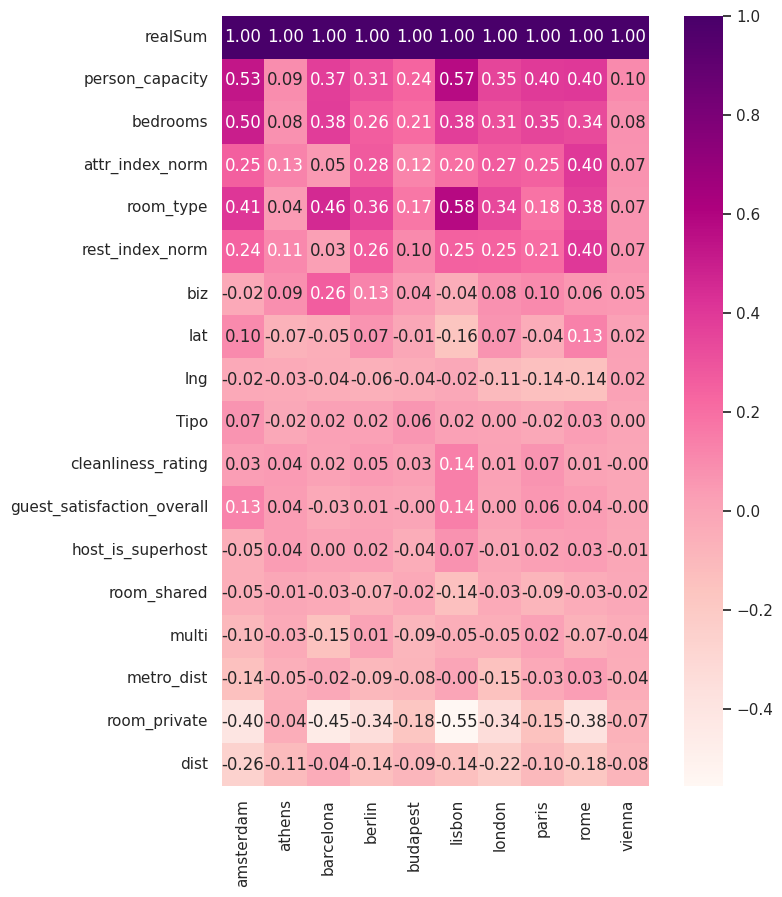

In [ ]:
cor_rS=pd.DataFrame({'amsterdam':ams_cor_rS,'athens':ath_cor_rS,'barcelona':bar_cor_rS,'berlin':ber_cor_rS,'budapest':bud_cor_rS,'lisbon':lis_cor_rS,'london':lon_cor_rS,'paris':par_cor_rS,'rome':rom_cor_rS,'vienna':vie_cor_rS})
sns.set(rc = {'figure.figsize':(9, 10)})
sns.heatmap(cor_rS,square=True, annot=True, fmt='.2f',cmap='RdPu')

De acuerdo al mapa anterior, en todas las ciudades la variable `realSum` tiene mayor relación con las siguientes dos variables: 

* `person_capacity` 

* `bedrooms`

Es de relevancia mencionar que solo se consideraron las primeras 5 variables después de `realSum`. Con ello procedemos a realizar la regresión lineal. 

# Regresión Lineal múltiple

Vamos a realizar regresión lineal con la librería scikit-learn. La cual es una librería de aprendizaje de máquina que contiene una gran cantidad de algoritmos de aprendizaje supervisado y no supervisado. Así como herramientas para preprocesamiento de datos, selección de modelos, evaluación de modelos, etc.

In [ ]:
#Agregamos una columna para que nos diga que ciudad es
amsterdam['City'] = 'AMSTERDAM'
athens['City'] = 'ATHENS'
barcelona['City'] = 'BARCELONA'
berlin['City'] = 'BERLIN'
budapest['City'] = 'BUDAPEST'
lisbon['City'] = 'LISBON'
london['City'] = 'LONDON'
paris['City'] = 'PARIS'
rome['City'] = 'ROME'
vienna['City'] = 'VIENNA'

In [ ]:
Cities = pd.concat([amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna])

In [ ]:
Cities

ID     realSum        room_type  room_shared  room_private  \
0        0  194.033698     Private room        False          True   
1        1  344.245776     Private room        False          True   
2        2  264.101422     Private room        False          True   
3        3  433.529398     Private room        False          True   
4        4  485.552926     Private room        False          True   
...    ...         ...              ...          ...           ...   
1794  3532  715.938574  Entire home/apt        False         False   
1795  3533  304.793960  Entire home/apt        False         False   
1796  3534  637.168969  Entire home/apt        False         False   
1797  3535  301.054157     Private room        False          True   
1798  3536  133.230489     Private room        False          True   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                 2.0              False      1    0                10.0  ...   
1                 4.0              False      0    0                 8.0  ...   
2                 2.0              False      0    1                 9.0  ...   
3                 4.0              False      0    1                 9.0  ...   
4                 2.0               True      0    0                10.0  ...   
...               ...                ...    ...  ...                 ...  ...   
1794              6.0              False      0    1                10.0  ...   
1795              2.0              False      0    0                 8.0  ...   
1796              2.0              False      0    0                10.0  ...   
1797              2.0              False      0    0                10.0  ...   
1798              4.0               True      1    0                10.0  ...   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  Tipo  \
0            4.166708   98.253896         6.846473   4.90569  52.41772    ES   
1           33.421209  837.280757        58.342928   4.90005  52.37432    ES   
2            3.985908   95.386955         6.646700   4.97512  52.36103    ES   
3           26.119108  875.033098        60.973565   4.89417  52.37663    ES   
4           29.272733  815.305740        56.811677   4.90051  52.37508    ES   
...               ...         ...              ...       ...       ...   ...   
1794        15.712158  438.756874        10.604584  16.37940  48.21136    FN   
1795        14.678608  342.182813         8.270427  16.38070  48.20296    FN   
1796        12.107921  282.296424         6.822996  16.38568  48.20460    FN   
1797         7.822803  158.563398         3.832416  16.34100  48.19200    FN   
1798        10.774264  225.247293         5.444140  16.39066  48.20811    FN   

           city   price_range  attraction_range       City  
0     amsterdam      (0, 332]        (0.0, 7.0]  AMSTERDAM  
1     amsterdam    (332, 461]     (21.0, 100.0]  AMSTERDAM  
2     amsterdam      (0, 332]        (0.0, 7.0]  AMSTERDAM  
3     amsterdam    (332, 461]     (21.0, 100.0]  AMSTERDAM  
4     amsterdam    (461, 687]     (21.0, 100.0]  AMSTERDAM  
...         ...           ...               ...        ...  
1794     vienna  (274, 13670]     (10.0, 100.0]     VIENNA  
1795     vienna  (274, 13670]     (10.0, 100.0]     VIENNA  
1796     vienna  (274, 13670]     (10.0, 100.0]     VIENNA  
1797     vienna  (274, 13670]        (6.0, 8.0]     VIENNA  
1798     vienna      (0, 163]     (10.0, 100.0]     VIENNA  

[51707 rows x 25 columns]

Vamos a añadir una columna extra para Cities.

In [ ]:
Cities['people_per_bedrooms'] = Cities['person_capacity']/Cities['bedrooms']

In [ ]:
# Cuando tenemos campos categoricos, debemos representar de manera numerica cada uno de ellos, para ello podemos usar one-hot encoding o bien label encoding.
# En este caso usaremos label encoding debido a que son pocas categorias
print(Cities['room_type'].unique())
print(Cities['Tipo'].unique())
print(Cities['City'].unique())

['Private room' 'Entire home/apt' 'Shared room']
['ES' 'FN']
['AMSTERDAM' 'ATHENS' 'BARCELONA' 'BERLIN' 'BUDAPEST' 'LISBON' 'LONDON'
 'PARIS' 'ROME' 'VIENNA']


Haremos la división en entrenamiento y prueba.

In [ ]:
# Primero dividimos en variables dependientes e independientes
X = Cities.drop(['people_per_bedrooms'], axis=1)
Y = Cities['realSum']

In [ ]:
# Usamos el metodo de sklearn para dividir en train y test
# test_size es el porcentaje de datos que se usaran para test
# Casi siempre se usa 80% para train y 20% para test (Regla de Pareto)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

Escalado de características. 

Dado que las características de entrada están en diferentes escalas, es importante escalarlas antes de entrenar un modelo. El escalado de características se puede realizar de varias maneras, pero la más común es la estandarización, que consiste en restar la media y dividir por la desviación estándar de cada característica. En scikit-learn, podemos hacer esto usando la clase StandardScaler.

In [ ]:
# Podemos escalar las columnas de a una por una, pero eso suele ser muy ineficiente,
# por lo que usaremos un pipeline para escalar todas las columnas a la vez
# Debemos tener cuidado de no escalar las columnas categoricas
# Para ello usaremos ColumnTransformer

# Nos aseguramos de que las columnas categoricas sean tratadas como tal
X_train['room_type'] = X_train['room_type'].astype('category')
X_test['room_type'] = X_test['room_type'].astype('category')

X_train['Tipo'] = X_train['Tipo'].astype('category')
X_test['Tipo'] = X_test['Tipo'].astype('category')

X_train['City'] = X_train['City'].astype('category')
X_test['City'] = X_test['City'].astype('category')

X_train.dtypes

ID                                               int64
realSum                                        float64
room_type                                     category
room_shared                                       bool
room_private                                      bool
person_capacity                                float64
host_is_superhost                                 bool
multi                                            int64
biz                                              int64
cleanliness_rating                             float64
guest_satisfaction_overall                     float64
bedrooms                                         int64
dist                                           float64
metro_dist                                     float64
attr_index                                     float64
attr_index_norm                                float64
rest_index                                     float64
rest_index_norm                                float64
lng       

Hacemos de nuevo la selección de características. 

In [ ]:
corr = Cities.corr(numeric_only=True)
corr['realSum'].sort_values(ascending=False)

realSum                       1.000000
attr_index_norm               0.292396
bedrooms                      0.221653
lat                           0.211805
person_capacity               0.203077
attr_index                    0.178228
rest_index_norm               0.144094
rest_index                    0.134722
biz                           0.037144
ID                            0.016240
guest_satisfaction_overall   -0.001888
people_per_bedrooms          -0.005588
cleanliness_rating           -0.006082
room_shared                  -0.035095
dist                         -0.044725
host_is_superhost            -0.045478
multi                        -0.052926
metro_dist                   -0.061025
room_private                 -0.171949
lng                          -0.173833
Name: realSum, dtype: float64

In [ ]:
# Creamos el pipeline
# Primero creamos un ColumnTransformer para escalar las columnas numericas
# Luego creamos un pipeline para escalar las columnas categoricas
# Finalmente creamos un ColumnTransformer para unir los dos pipelines
# El resultado es un pipeline que escala todas las columnas excepto las categoricas y luego las une con las categoricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, 
                                                ['attr_index_norm','bedrooms','person_capacity','rest_index_norm']),
                                            ('cat', categorical_transformer, ['room_type', 'City'])])

In [ ]:
# Observemos el resultado
pd.DataFrame(preprocessor.fit_transform(X_train))

0         1         2         3    4    5    6    7    8    9   \
0     -0.600843 -0.256839 -0.897582 -0.027866  1.0  0.0  0.0  0.0  0.0  0.0   
1     -0.906895 -0.256839  1.406531 -1.141665  1.0  0.0  0.0  0.0  0.0  0.0   
2     -1.024092 -0.256839 -0.897582 -0.568023  1.0  0.0  0.0  0.0  0.0  0.0   
3     -0.272045  1.333363  0.638493 -0.940822  1.0  0.0  0.0  0.0  0.0  0.0   
4      4.722107 -0.256839 -0.897582  0.544144  1.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
41360 -0.801936 -0.256839  0.638493 -0.926763  0.0  0.0  1.0  0.0  0.0  1.0   
41361 -0.255801 -0.256839 -0.897582  0.123101  1.0  0.0  0.0  0.0  0.0  0.0   
41362 -0.260454 -0.256839  0.638493  1.373650  1.0  0.0  0.0  0.0  0.0  0.0   
41363  0.017101  1.333363  0.638493  0.204365  1.0  0.0  0.0  0.0  0.0  0.0   
41364 -0.464764 -0.256839  2.174569  0.891929  1.0  0.0  0.0  0.0  0.0  0.0   

        10   11   12   13   14   15   16  
0      0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
41360  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
41361  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
41362  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
41363  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
41364  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

[41365 rows x 17 columns]

In [ ]:
# Guardemos los resultados en variables
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
# Transformemos tambien Y
Y_train_proc = numeric_transformer.fit_transform(Y_train.values.reshape(-1,1))#Y_train.values.reshape(-1,1)
Y_test_proc = numeric_transformer.fit_transform(Y_test.values.reshape(-1,1))#Y_test.values.reshape(-1,1)

In [ ]:
# Ahora si, ya podemos entrenar nuestro modelo, pero primero debemos definirlo
# En este caso usaremos un modelo de regresion lineal
# Recuerda que el modelo de regresion lineal es de la forma y = w0 + w1*x1 + w2*x2 + ... + wn*xn
lin = LinearRegression()

In [ ]:
# Entrenamos el modelo
lin = lin.fit(X_train_proc, Y_train_proc.ravel())

In [ ]:
# Calculamos R^2
print('R^2 en train {}'.format(lin.score(X_train_proc, Y_train_proc)))
print('R^2 en test {}'.format(lin.score(X_test_proc, Y_test_proc)))

R^2 en train 0.2391759884035809
R^2 en test 0.23640057123930203


Los coeficientes de determinación nos indican que solo 23.78% de los datos de entrenamiento se ajustan a la regresión lineal y para los datos de prueba solo el 24.11%.

In [ ]:
print('La pendiente es {}'.format(lin.intercept_))
print('Las ordenadas son {}'.format(lin.coef_))

La pendiente es -0.15601502515573729
Las ordenadas son [ 0.20996987  0.1635198   0.10038976  0.00415003  0.32487313 -0.02850466
 -0.29636847  0.85200187 -0.43284878  0.12911755 -0.06768926 -0.4535851
 -0.08920232  0.16594355  0.23307866 -0.22763532 -0.10918084]


La ecuación obtenida es la siguiente:

\begin{equation*}
    y = -0.1505 + 0.1954 x_1 + 0.1579 x_2 + 0.1055 x_3 + 0.01242 x_4 
\end{equation*}

donde $y=realSum$, $x_1=attr\_index\_norm$, $x_2=bedrooms$, $x_3=person\_capacity$ y $x_4=rest\_index\_norm$. 

In [ ]:
# Podemos predecir para calcular el error
train_pred = lin.predict(X_train_proc)
train_pred

array([-0.31715809, -0.03627827, -0.26983627, ...,  0.05276887,
        0.6885051 ,  0.16207712])

In [ ]:
# Calculamos para train
mse_train = mean_squared_error(Y_train_proc, train_pred)
rmse_train = np.sqrt(mse_train)
rmse_train

0.8722522637382026

In [ ]:
# Ahora para test
test_pred = lin.predict(X_test_proc)
mse = mean_squared_error(Y_test_proc, test_pred)
rmse = np.sqrt(mse)
rmse

0.8738417641430845

Nuestros errores son demasiado altos, por lo que, entrenar el modelo con esas variables no fue óptimo. 

Lo cual nos lleva a pensar que sería una mejor opción hacer la regresión lineal para cada ciudad en lugar de hacerlo para todas. Dado que, el porcentaje de relación varía en cada caso. 

### Regresión Lineal a través de SGD

In [ ]:
#instancia modelo
lin = SGDRegressor(penalty=None, learning_rate='constant', eta0=3e-4, max_iter=5000,
                   n_iter_no_change=5001).fit(
    X_train_proc, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
lin.score(X_train_proc, Y_train)

0.2356245616775321

`score()` automatiza la predicción de sus datos usando X_train_proc y los compara con Y_train y, de forma predeterminada, usa la métrica R-squared para hacerlo. Por lo tanto, no es necesario derivar manualmente y_pred.

Obtenemos que 23.74% de los datos se predicen. 

In [ ]:
print('La pendiente es {}'.format(lin.intercept_))
print('Las ordenadas son {}'.format(lin.coef_))

La pendiente es [168.39078923]
Las ordenadas son [  57.96515739   48.05624912   29.28593121   -0.31193463  164.01192434
   47.78544781  -43.40658292  294.79534703 -122.6226939    58.56341237
   -5.55184483 -130.91241009  -11.99550559   69.44188782   92.31398489
  -57.30474695  -18.33664153]


In [ ]:
def train_SGD(X_train, Y_train, X_test, Y_test, eta0=1e-3, iter=100000):
    model = SGDRegressor(penalty=None, learning_rate='constant', eta0=eta0, max_iter=100000,
                         n_iter_no_change=iter+1)
    loss_train = []
    loss_test = []
    for i in range(iter):
        model.partial_fit(X_train, Y_train)
        loss_train.append(np.sqrt(mean_squared_error(Y_train, model.predict(X_train))))
        loss_test.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))
    del model
    return loss_train, loss_test

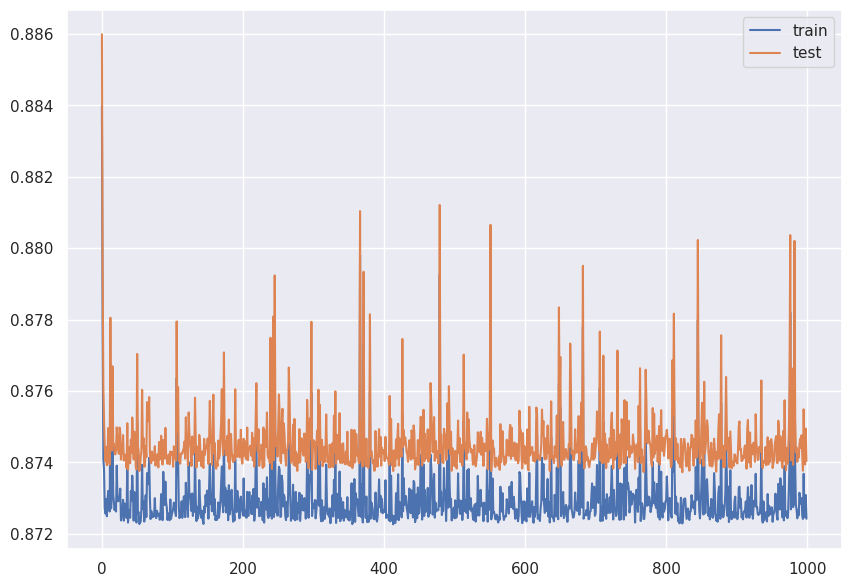

In [ ]:
plt.figure(figsize=(10,7))
a,b = train_SGD(X_train_proc, Y_train_proc.ravel(), X_test_proc, Y_test_proc.ravel(), 
                eta0=3e-4, iter=1000)
plt.plot(a, label='train')
plt.plot(b, label='test')
plt.legend();

### Algunas gráficas de los supuestos de la regresión lineal

Vamos a identificar cual supuesto de la regresión lineal no se cumple.

In [ ]:
residuales_train = (Y_train_proc.ravel() - train_pred.ravel())
res_t = {'residuales': residuales_train, 'predicted_val':train_pred, 'tipo': 'train'}
residuales_train = pd.DataFrame(res_t)
residuales_test = (Y_test_proc.ravel() - test_pred.ravel())
res_tr = {'residuales': residuales_test, 'predicted_val':test_pred, 'tipo': 'test'}
residuales_test = pd.DataFrame(res_tr)

residuales = pd.concat([residuales_test,residuales_train])

### Normalidad

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


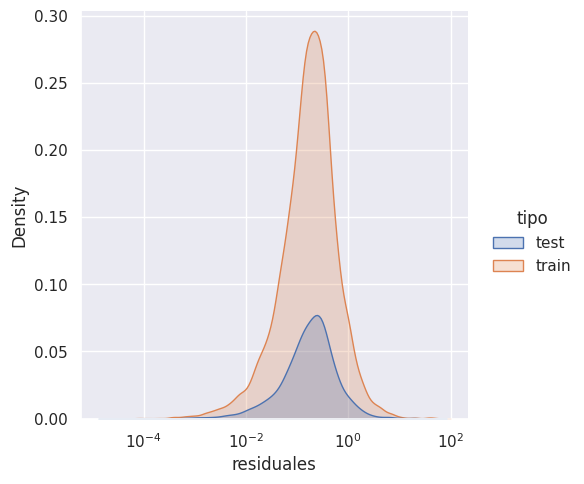

In [ ]:
sns.displot(data=residuales, x='residuales', hue='tipo', kind='kde', fill=True, log_scale=True);

En este histograma se observa que claramente no se tiene normalidad en los datos y es una de las razones por las cuales al implementar la regresión lineal no se obtuvieron resultados óptimos. 

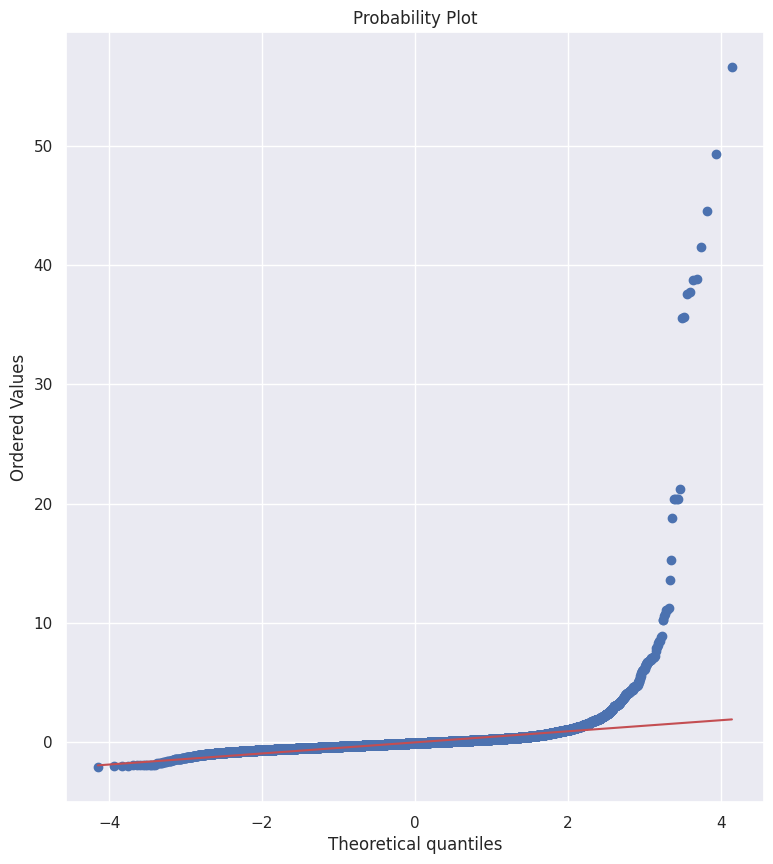

In [ ]:
# para entrenamiento
stats.probplot(residuales_train['residuales'], plot=pylab);

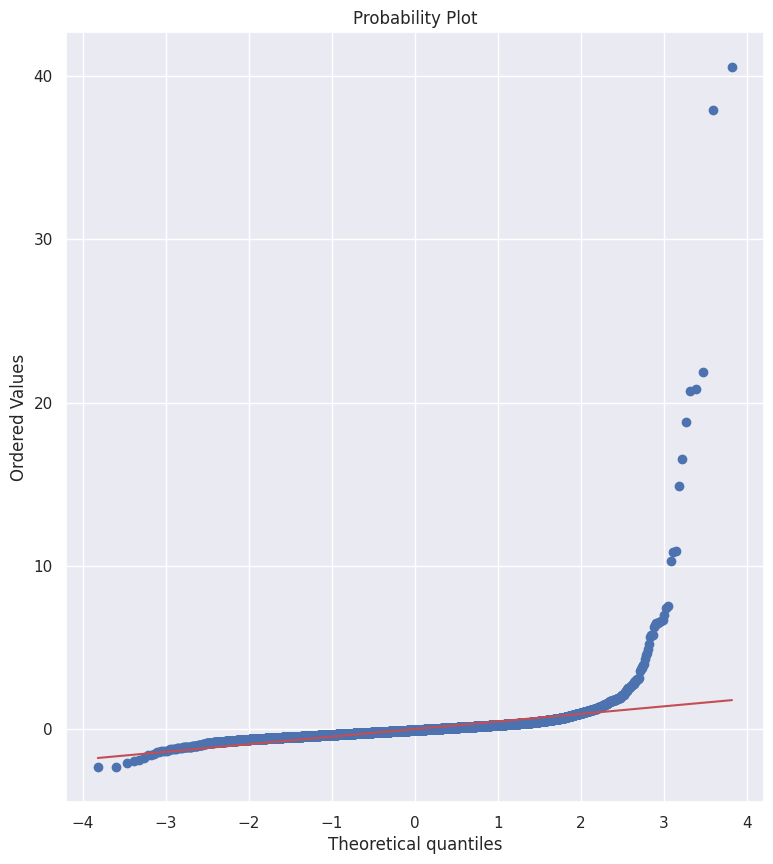

In [ ]:
# para test
stats.probplot(residuales_test['residuales'], plot=pylab);

### Homocedasticidad

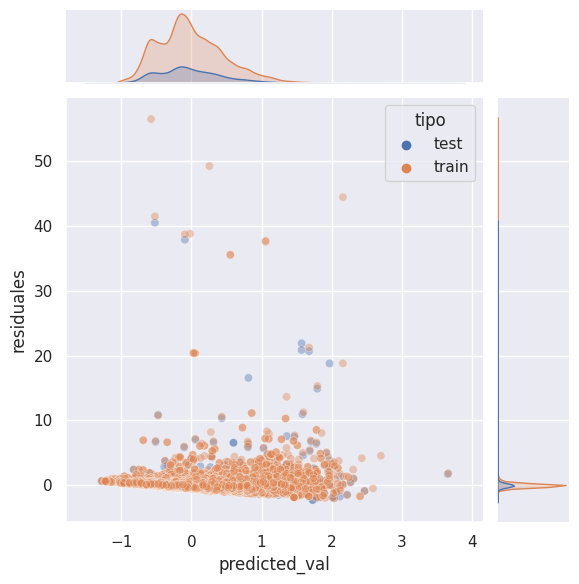

In [ ]:
sns.jointplot(data=residuales, x='predicted_val', y='residuales', hue='tipo',
              alpha=0.4)

 Tenemos que el error cambio en todos los valores de la variable independiente ($people\_per\_bedrooms$). 

### No autocorrelación

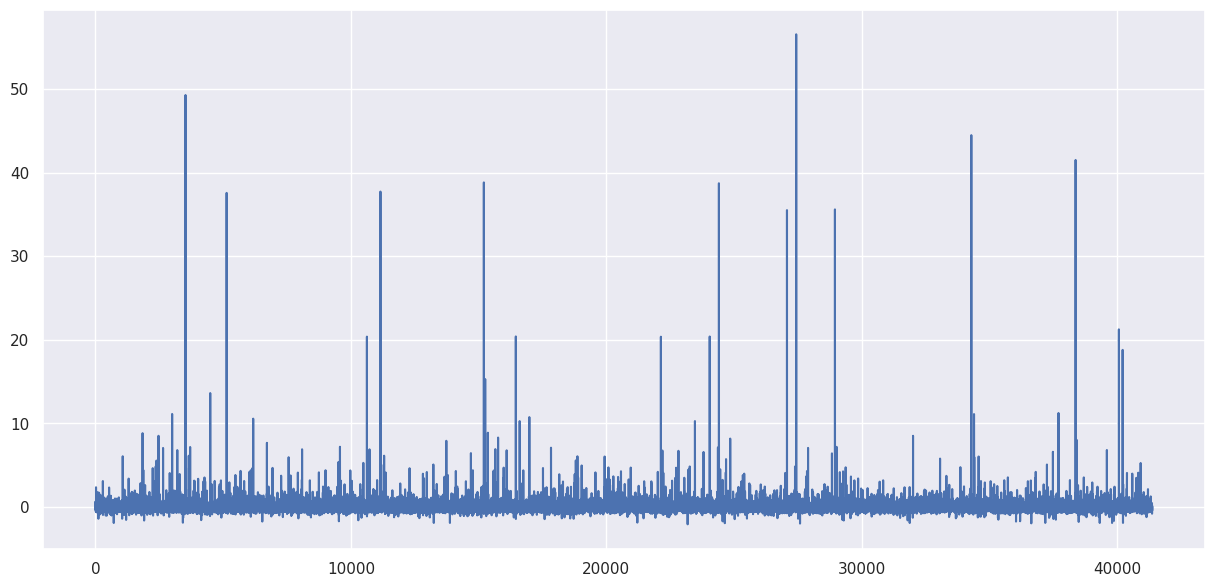

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(residuales_train['residuales'])

Tenemos que no se tiene autocorrelación entre los valores del término de error. 


##Recomendaciones

Con toda la información obtenida con anterioridad, y de acuerdo a las preferencias de cada cliente. Presentamos un ejemplo de como encontrar la mejor opción en Lisboa para un viaje de pareja y de tres o más personas.


Priorizando el precio bajo, la cercanía con la ciudad, el metro y los atractivos como los restaurantes y atracciones en general. Realizamos lo siguiente:

In [ ]:

#Filtro para determinar cuantas personas queremos
data_filtrada_1 = lisbon[(lisbon['person_capacity'] == 2) & (lisbon['biz'] == 0)]

# Asignamos el peso a las variables 
#5 es el valor mas alto y 1 el mas bajo
pesos = {
    'realSum': 1,
    'cleanliness_rating': 5,
    'dist': 1,
    'metro_dist': 1,
    'attr_index': 5,
    'rest_index': 5
}

# Normalizamos el valor de los parametros
data_normalizada = data_filtrada_1.copy()
for columna in pesos.keys():
    columna_min = data_filtrada_1[columna].min()
    columna_max = data_filtrada_1[columna].max()
    data_normalizada[columna] = (data_filtrada_1[columna] - columna_min) / (columna_max - columna_min)

# Calculamos la puntuación
data_normalizada['puntaje'] = 0
for columna, peso in pesos.items():
    data_normalizada['puntaje'] += data_normalizada[columna] * peso

# Seleccionamos el top 5 sin reordenar
#Identificandolo por el nombre top_5_lisbon_p
top_5_lisbon_p = data_filtrada_1.loc[data_normalizada.nlargest(7, 'puntaje').index]

# Recetamos el indice para el top 5
top_5_lisbon_p.reset_index(drop=True, inplace=True)

pd.DataFrame(top_5_lisbon_p)



ID     realSum        room_type  room_shared  room_private  \
0  2934  262.664165  Entire home/apt        False         False   
1    90  263.602251  Entire home/apt        False         False   
2  3756  342.166979  Entire home/apt        False         False   
3   914  333.255159  Entire home/apt        False         False   
4   919  299.484053  Entire home/apt        False         False   
5  3776  323.874296  Entire home/apt        False         False   
6   919  299.484053  Entire home/apt        False         False   
7  3776  323.874296  Entire home/apt        False         False   
8  1121  298.545966  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              2.0              False      1    0                10.0  ...   
2              2.0              False      0    0                10.0  ...   
3              2.0               True      0    0                10.0  ...   
4              2.0              False      0    0                10.0  ...   
5              2.0              False      1    0                10.0  ...   
6              2.0              False      0    0                10.0  ...   
7              2.0              False      1    0                10.0  ...   
8              2.0               True      1    0                10.0  ...   

   attr_index_norm   rest_index  rest_index_norm      lng       lat  Tipo  \
0       100.000000   827.819063        46.525621 -9.12789  38.71117    FN   
1       100.000000   828.072448        37.034490 -9.12789  38.71117    ES   
2        12.815491  1489.621556        83.720671 -9.14442  38.71231    FN   
3        11.508910  1507.402159        67.416650 -9.14473  38.71112    ES   
4        12.827532  1489.596192        66.620300 -9.14442  38.71231    ES   
5        16.185171  1431.822989        80.472239 -9.14154  38.71201    FN   
6        12.827532  1489.596192        66.620300 -9.14442  38.71231    ES   
7        16.185171  1431.822989        80.472239 -9.14154  38.71201    FN   
8        12.149185  1480.013172        66.191712 -9.14400  38.71100    ES   

     city  price_range  attraction_range    City  
0  lisbon   (226, 287]         (11, 100]  LISBON  
1  lisbon   (226, 287]         (11, 100]  LISBON  
2  lisbon  (287, 1690]         (11, 100]  LISBON  
3  lisbon  (287, 1690]         (11, 100]  LISBON  
4  lisbon  (287, 1690]         (11, 100]  LISBON  
5  lisbon  (287, 1690]         (11, 100]  LISBON  
6  lisbon  (287, 1690]         (11, 100]  LISBON  
7  lisbon  (287, 1690]         (11, 100]  LISBON  
8  lisbon  (287, 1690]         (11, 100]  LISBON  

[9 rows x 25 columns]

En el data frame top_5_lisbon_p, tenemos las 5 mejores opciones para viajes en pareja, priorizando las características antes mencionadas, por lo que ahora, buscamos hacer lo propio para estancias con más personas.

In [ ]:
#Filtro para determinar cuantas personas queremos
data_filtrada_1 = lisbon[(lisbon['person_capacity'] >= 3) & (lisbon['biz'] == 0)]

# Asignamos el peso a las variables 
#5 es el valor mas alto y 1 el mas bajo
pesos = {
    'realSum': 1,
    'cleanliness_rating': 5,
    'dist': 1,
    'metro_dist': 1,
    'attr_index': 5,
    'rest_index': 5
}

# Normalizamos el valor de los parametros
data_normalizada = data_filtrada_1.copy()
for columna in pesos.keys():
    columna_min = data_filtrada_1[columna].min()
    columna_max = data_filtrada_1[columna].max()
    data_normalizada[columna] = (data_filtrada_1[columna] - columna_min) / (columna_max - columna_min)

# Calculamos la puntuación
data_normalizada['puntaje'] = 0
for columna, peso in pesos.items():
    data_normalizada['puntaje'] += data_normalizada[columna] * peso

# Seleccionamos el top 5 sin reordenar
#Identificandolo por el nombre top_5_lisbon_f
top_5_lisbon_f = data_filtrada_1.loc[data_normalizada.nlargest(7, 'puntaje').index]

# Recetamos el indice para el top 5
top_5_lisbon_f.reset_index(drop=True, inplace=True)

pd.DataFrame(top_5_lisbon_f)

ID     realSum        room_type  room_shared  room_private  \
0    95  374.296435  Entire home/apt        False         False   
1   894  263.602251  Entire home/apt        False         False   
2  5762  262.898687  Entire home/apt        False         False   
3  3633  465.056285  Entire home/apt        False         False   
4   790  188.086304  Entire home/apt        False         False   
5  3688  355.065666  Entire home/apt        False         False   
6   838  333.255159  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              4.0              False      0    0                10.0  ...   
1              4.0               True      1    0                10.0  ...   
2              4.0               True      1    0                10.0  ...   
3              6.0               True      0    0                10.0  ...   
4              4.0              False      1    0                10.0  ...   
5              5.0              False      1    0                10.0  ...   
6              5.0              False      1    0                10.0  ...   

   attr_index_norm   rest_index  rest_index_norm      lng       lat  Tipo  \
0        50.416725   723.681157        32.365722 -9.12776  38.71099    ES   
1        16.912759  1620.220939        72.462326 -9.14300  38.71200    ES   
2        16.896528  1620.114401        91.054714 -9.14300  38.71200    FN   
3        13.359410  1617.132968        90.887150 -9.14375  38.71177    FN   
4        12.802893  1625.482895        72.697661 -9.14416  38.71193    ES   
5        12.376719  1599.189354        89.878671 -9.14500  38.71200    FN   
6        12.388131  1600.364432        71.574269 -9.14500  38.71200    ES   

     city  price_range  attraction_range    City  
0  lisbon  (287, 1690]         (11, 100]  LISBON  
1  lisbon   (226, 287]         (11, 100]  LISBON  
2  lisbon   (226, 287]         (11, 100]  LISBON  
3  lisbon  (287, 1690]         (11, 100]  LISBON  
4  lisbon   (161, 226]         (11, 100]  LISBON  
5  lisbon  (287, 1690]         (11, 100]  LISBON  
6  lisbon  (287, 1690]         (11, 100]  LISBON  

[7 rows x 25 columns]

Ahora, buscamos graficarlos en un mapa identificandolos por la preferencia en cuanto al número de huespedes. Para esto, agregamos una columna y concatenamos

In [ ]:
#Asignamos el diferenciador a cada archivo en la nueva columna ''Preferencia''
#con 'Pareja' paraa las estancias en pareja y 'Familia' para las estancias en familia
top_5_lisbon_p['Preferencia'] = 'Pareja'
top_5_lisbon_f['Preferencia'] = 'Familia'

#Ahora concatenamos los dos en un solo data framw

recom_lisbon = pd.concat([top_5_lisbon_p,top_5_lisbon_f])

recom_lisbon


ID     realSum        room_type  room_shared  room_private  \
0  2934  262.664165  Entire home/apt        False         False   
1    90  263.602251  Entire home/apt        False         False   
2  3756  342.166979  Entire home/apt        False         False   
3   914  333.255159  Entire home/apt        False         False   
4   919  299.484053  Entire home/apt        False         False   
5  3776  323.874296  Entire home/apt        False         False   
6   919  299.484053  Entire home/apt        False         False   
7  3776  323.874296  Entire home/apt        False         False   
8  1121  298.545966  Entire home/apt        False         False   
0    95  374.296435  Entire home/apt        False         False   
1   894  263.602251  Entire home/apt        False         False   
2  5762  262.898687  Entire home/apt        False         False   
3  3633  465.056285  Entire home/apt        False         False   
4   790  188.086304  Entire home/apt        False         False   
5  3688  355.065666  Entire home/apt        False         False   
6   838  333.255159  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              2.0              False      1    0                10.0  ...   
2              2.0              False      0    0                10.0  ...   
3              2.0               True      0    0                10.0  ...   
4              2.0              False      0    0                10.0  ...   
5              2.0              False      1    0                10.0  ...   
6              2.0              False      0    0                10.0  ...   
7              2.0              False      1    0                10.0  ...   
8              2.0               True      1    0                10.0  ...   
0              4.0              False      0    0                10.0  ...   
1              4.0               True      1    0                10.0  ...   
2              4.0               True      1    0                10.0  ...   
3              6.0               True      0    0                10.0  ...   
4              4.0              False      1    0                10.0  ...   
5              5.0              False      1    0                10.0  ...   
6              5.0              False      1    0                10.0  ...   

    rest_index  rest_index_norm      lng       lat  Tipo    city  price_range  \
0   827.819063        46.525621 -9.12789  38.71117    FN  lisbon   (226, 287]   
1   828.072448        37.034490 -9.12789  38.71117    ES  lisbon   (226, 287]   
2  1489.621556        83.720671 -9.14442  38.71231    FN  lisbon  (287, 1690]   
3  1507.402159        67.416650 -9.14473  38.71112    ES  lisbon  (287, 1690]   
4  1489.596192        66.620300 -9.14442  38.71231    ES  lisbon  (287, 1690]   
5  1431.822989        80.472239 -9.14154  38.71201    FN  lisbon  (287, 1690]   
6  1489.596192        66.620300 -9.14442  38.71231    ES  lisbon  (287, 1690]   
7  1431.822989        80.472239 -9.14154  38.71201    FN  lisbon  (287, 1690]   
8  1480.013172        66.191712 -9.14400  38.71100    ES  lisbon  (287, 1690]   
0   723.681157        32.365722 -9.12776  38.71099    ES  lisbon  (287, 1690]   
1  1620.220939        72.462326 -9.14300  38.71200    ES  lisbon   (226, 287]   
2  1620.114401        91.054714 -9.14300  38.71200    FN  lisbon   (226, 287]   
3  1617.132968        90.887150 -9.14375  38.71177    FN  lisbon  (287, 1690]   
4  1625.482895        72.697661 -9.14416  38.71193    ES  lisbon   (161, 226]   
5  1599.189354        89.878671 -9.14500  38.71200    FN  lisbon  (287, 1690]   
6  1600.364432        71.574269 -9.14500  38.71200    ES  lisbon  (287, 1690]   

   attraction_range    City  Preferencia  
0         (11, 100]  LISBON       Pareja  
1         (11, 100]  LISBON       Pareja  
2         (11, 100]  LISBON    

De la tabla anterior, podemos identificar cada Airbnb por su ID y ver sus especificaciones. Dentro de las cuales, podemos ponerlos en el mapa como lo hicimos previamente y hacerlo más ilustrativo.




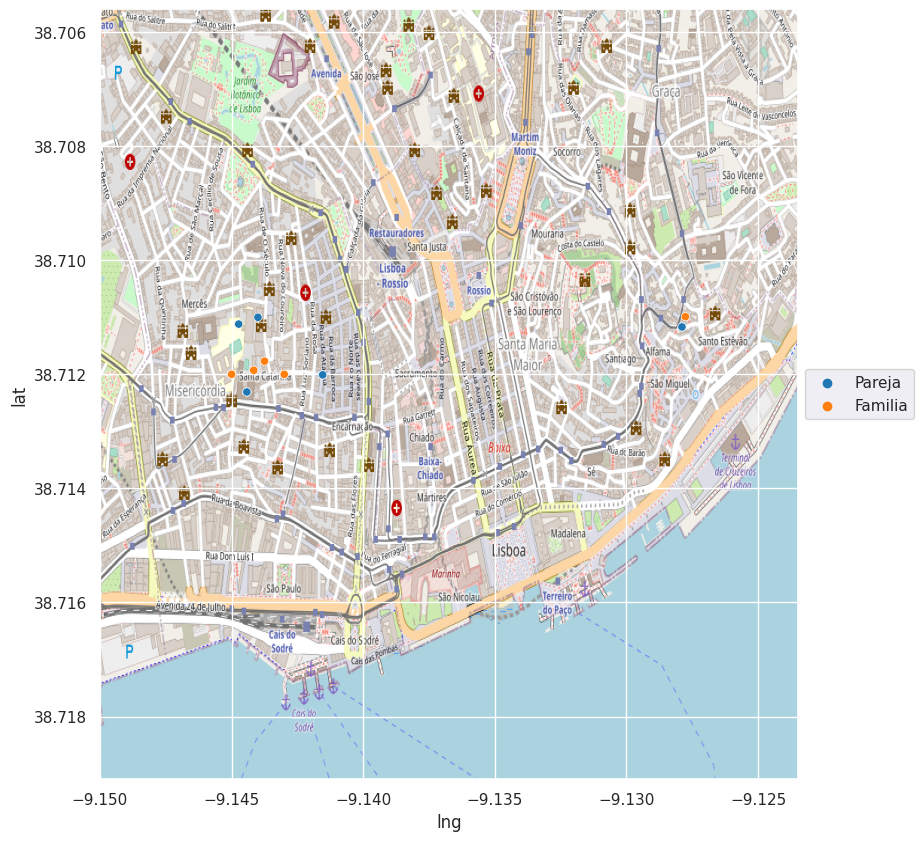

In [ ]:
#Coordenadas 
BBox_lis = (-9.15, -9.1235, 38.7191, 38.7056)

#Mapa de fondo
mapa_r = plt.imread(join(path,'lisboa_rec.png'))

#Especificaciones
lisbon_r = sns.scatterplot(data=recom_lisbon, x='lng', y='lat', hue ='Preferencia', palette='tab10')
lisbon_r.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
lisbon_r.set_xlim(BBox_lis[0],BBox_lis[1])
lisbon_r.set_ylim(BBox_lis[2],BBox_lis[3])
lisbon_r.imshow(mapa_r,zorder=0, extent = BBox_lis, aspect= 'auto')

Con esta gráfica, podemos fácilmente identificar la ubicación de cada estancia y como está en el código, se puede personalizar para dar prioridad a otros aspectos, o dejar otros de lado.

Con lo que sumado a la información encontrada en las secciones previas, podemos encontrar la mejor opción en cuanto a ciudad y posteriormente encontrar las estancias que ofrecen lo que buscamos.

##Conclusiones


Los precios más altos de los alojamientos de Airbnb en ciudades como Londres y Roma se concentran alrededor de las atracciones principales en el centro de la ciudad. En cambio, en ciudades como Lisboa y Barcelona, las atracciones están distribuidas por toda la ciudad, lo que permite encontrar alojamientos cerca de diferentes atracciones a una variedad de precios.

La mayoría de los alojamientos de Airbnb están diseñados para estancias de dos personas, lo cual limita la oferta para grupos mayores a tres. Sin embargo, se identificaron ciudades con una mayor oferta para viajes en grupos grandes.

En la mayoría de las ciudades, los alojamientos más comunes en Airbnb son casas completas o apartamentos, mientras que los cuartos compartidos no son comunes.

Las calificaciones de los alojamientos de Airbnb están relacionadas principalmente con la limpieza. Además, se encontró que los hosts con la designación de "superhost" tienden a tener calificaciones más altas. Sin embargo, la relación entre estas variables indica que si un host es un superhost, es más probable que tenga una buena calificación, pero no garantiza una calificación alta.

Se observó una variación en el precio promedio de los alojamientos de Airbnb entre los días de semana y los fines de semana. Amsterdam resultó ser la ciudad más cara en ambos casos, mientras que Atenas fue la más económica.

La variable "realSum" muestra una mayor relación con las variables "person_capacity" y "bedrooms" en todas las ciudades analizadas. Esto sugiere que la capacidad de personas y el número de habitaciones influyen en el precio real de los alojamientos.

A través del análisis de regresión lineal, no se encontró una relación lineal significativa entre las variables de entrada "person_capacity" y "bedrooms" y la variable de salida "realSum". Los coeficientes de determinación indican que solo un pequeño porcentaje de los datos se ajusta a la regresión lineal, tanto en los datos de entrenamiento como en los de prueba (23.78\% y 24.11\%, respectivamente). Esto sugiere que otros factores pueden tener una mayor influencia en el precio real de los alojamientos. Además, dos de los cuatro supuestos de la regresión lineal no se cumplen. 